<a href="https://colab.research.google.com/github/sofficial000/Capstone-_classification_mobile_price_range/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**    - P SAI PRASAD


# **Project Summary**

A) **The mobile phone industry is fiercely competitive, and the price of a mobile phone is determined by multiple factors such as battery power, Bluetooth, camera quality, and screen size. To investigate the factors that influence the price range of mobile phones, a study was conducted. The study utilized a dataset containing approximately 21 variables to forecast the price range of mobile phones, which are categorized as low, medium, high, and very high.**

B) **Initially, the analysis process focused on data wrangling, which involved managing missing values and verifying unique values. During this stage, it was discovered that 180 mobile phones had a pixel resolution height of 0, and two phones had a screen width of 0 cm. It is not logical for a phone screen width or pixel height to be 0, so the I decided to replace these 0 values with the mean values. This ensured that the dataset had no missing values.**

C) **After I finished data wrangling, I performed exploratory data analysis (EDA). From this analysis, I discovered that all categories of mobile phones had an equal price range distribution. Furthermore, I found that there was a positive correlation between the battery capacity of a phone and its price range. The distribution of battery capacity also gradually increased as the price range increased, implying that consumers may be willing to pay more for a mobile phone with a higher battery capacity. In terms of Bluetooth usage, I found that almost half of the devices had it, while the other half did not.**

D) **From the scatter plot, it was evident that there was a positive correlation between RAM and price range. The majority of the data points were clustered towards the upper right corner, indicating that as the price range increased, so did the amount of RAM in the device. The study also discovered that the count of devices with dual sim was increasing for the highest price range. Furthermore, the distribution of primary camera megapixels across various target categories remained consistent, suggesting that this feature may not have a significant impact on the price range of mobile phones.**

E) **Based on the analysis of screen size distribution among different target categories, it was observed that there was not a significant difference in the distribution. This suggests that screen size alone may not be the primary factor in determining target categories. However, this consistency in distribution can be beneficial for predictive modeling, as it indicates that screen size may not play a significant role in distinguishing between different target categories, enabling other features to have a more significant impact in determining the target categories. Additionally, the study revealed that mobile phones with higher price ranges were generally lighter in weight than those with lower price ranges.**

F) **Following the exploratory data analysis (EDA), the study conducted hypothesis testing on three statements while handling outliers. During this process, the study identified that RAM, battery power, and pixel quality were the most significant factors influencing the price range of mobile phones. Afterward, the study engaged in feature engineering and utilized various machine learning models, such as logistic regression, random forest, and XGBoost. After conducting experiments, the study found that logistic regression and XGBoost algorithms with hyperparameter tuning delivered the most accurate results in predicting the price range of mobile phones.**

H) **In summary, the study discovered that the mobile phones in the dataset were separated into four distinct price ranges, each containing an equivalent number of elements. Roughly half of the devices in the dataset had Bluetooth, while the other half did not. Additionally, the study observed that as the price range increased, there was a gradual rise in battery power, and the amount of RAM in the device exhibited continuous growth from low-cost to very high-cost phones. Moreover, the study identified that expensive phones generally tended to be lighter than their lower-priced counterparts.**



# **GitHub Link -**

# **Problem Statement**


**In the competitive mobile phone market, companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Load Dataset

# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Mobile Price Range Dataset
df = pd.read_csv('/content/drive/MyDrive/Almabetter/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# First Look

# Checking the first 5 rows of data
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Checking the bottom 5 rows of the data
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info

# Data information. Inspecting each columns and its dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_values_count = len(df[df.duplicated()])

print("Number of duplicate values:", duplicate_values_count)

Number of duplicate values: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, 'Places of missing values in the columns')

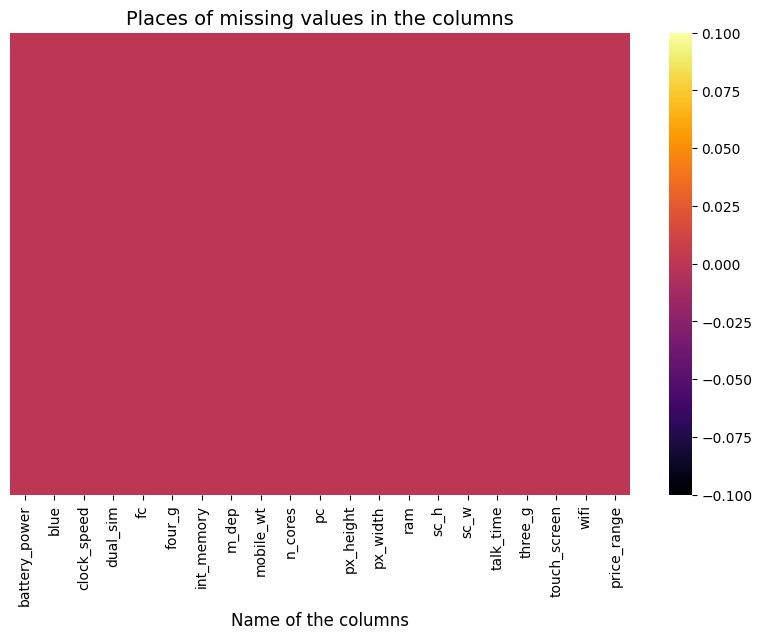

In [ ]:
# Visualizing the missing values
# Creating heatmap for null values
plt.figure(figsize = (10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = 'inferno')
plt.xlabel("Name of the columns", fontsize = 12)
plt.title("Places of missing values in the columns", fontsize = 14)

### What did you know about your dataset?

###**Observations About the Dataset**

**1**. The dataset has 2000 rows and 21 columns.

**2**. There are no identical values in the dataset.

**3**. There are no empty or null values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Length of the columns
print(f'There are {len(df.columns)} columns in this mobile price range dataset')

There are 21 columns in this mobile price range dataset


In [ ]:
# Dataset Describe

# Checking statistical data on numerical columns
df.describe(include='all')

# Transpose of Data Description for better visibility and analysis
df.describe().T


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description

A) **Battery_power:** *Total energy a battery can store in single time measured in mAh.*

B) **Blue:** *Has bluetooth or not.*

C) **Clock_speed:** *Speed at which microprocessor executes instructions.*

D) **Dual_sim:** *Has dual sim support or not.*

E) **Fc:** *Front Camera Mega Pixels.*

F) **Four_g:** *Has 4G or not.*

G) **Int_memory:** *Internal Memory in Gigabytes.*

H) **M_dep:** *Mobile Depth in cm.*

I) **Mobile_wt:** *Weight of mobile phone.*

J) **N_cores:** *Number of cores of processor.*

K) **Pc:** *Primary Camera Mega Pixels.*

L) **Px_height:** *Pixel Resolution Height.*

M) **Px_width:** *Pixel Resolution Width.*

N) **Ram:** *Random Access Memory in Megabytes.*

O) **Touch_screen:** *Has touch screen or not.*

P) **Wifi:** *Has wifi or not.*

Q) **Sc_h:** *Screen Height of mobile in cm.*

R) **Sc_w:** *Screen Width of mobile in cm.*

S) **Talk_time:** *longest time that a single battery charge will last when you are online.*

T) **Three_g:** *Has 3G or not.*

U) **Wifi:** *Has wifi or not.*

V) **Price_range:** *This is the target variable with value of 0(low cost), 1(medium cost), 2(High Cost), 3(Very High cost).*

### Check Unique Values for each variable

In [ ]:
# Checking Unique Values for each variable
for column in df.columns:
    unique_values = df[column].unique()
    print(f"The Unique values for variable [{column}] are: {unique_values}")

The Unique values for variable [battery_power] are: [ 842 1021  563 ... 1139 1467  858]
The Unique values for variable [blue] are: [0 1]
The Unique values for variable [clock_speed] are: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
The Unique values for variable [dual_sim] are: [0 1]
The Unique values for variable [fc] are: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
The Unique values for variable [four_g] are: [0 1]
The Unique values for variable [int_memory] are: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
The Unique values for variable [m_dep] are: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
The Unique values for variable [mobile_wt] are: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 1

In [ ]:
# Checking the total number of Unique Values for each variable
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready

# It is not logical for a phone screen width or pixel height to have a value of 0, so we need to make sure to verify and address such instances to prevent any complications in our analysis
# Count of phones with sc_w = 0
sc_w_zero_count = sum(df.sc_w == 0)
print(f"Number of phones with sc_w = 0: {sc_w_zero_count}")

# Count of phones with px_height = 0
px_height_zero_count = sum(df.px_height == 0)
print(f"Number of phones with px_height = 0: {px_height_zero_count}")

Number of phones with sc_w = 0: 180
Number of phones with px_height = 0: 2


In [ ]:
# Replacing 0 values with the mean value
sc_w_mean = df.sc_w.mean()
px_height_mean = df.px_height.mean()

df.sc_w = np.where(df.sc_w == 0, sc_w_mean, df.sc_w)
df.px_height = np.where(df.px_height == 0, px_height_mean, df.px_height)

# Printing the updated dataframe
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [ ]:
# Checking for the 0 values in the sc_w and px_height columns after the data wrangling

# Count of phones with sc_w = 0
sc_w_zero_count = sum(df.sc_w == 0)
print(f"Number of phones with sc_w = 0: {sc_w_zero_count}")

# Count of phones with px_height = 0
px_height_zero_count = sum(df.px_height == 0)
print(f"Number of phones with px_height = 0: {px_height_zero_count}")

Number of phones with sc_w = 0: 0
Number of phones with px_height = 0: 0


#### Duplicate Values

In [ ]:
# Checking whether there are duplicates or not
print(f'There are {len(df[df.duplicated()])} duplicate values in the mobile price range data set')

There are 0 duplicate values in the mobile price range data set


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### What all manipulations have you done and insights you found?

###**Observations:**

**A)** I discovered that there are 2 phones in the dataset with a pixel height value of 0, and 180 phones with a screen width value of 0.

**B)** It is illogical for a phone screen width or pixel height to have a value of 0, so it is necessary to identify and address these instances properly to prevent any potential problems in our analysis.

**C)** The 0 values in the dataset have been replaced with their respective column mean values, ensuring that there are no longer any missing values in the table. Therefore, our data is now prepared for data analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#EDA (Exploratory Data Analysis)

##Chart - 1 | What is the percentage of different classes of mobile price range?##

**Price Range**

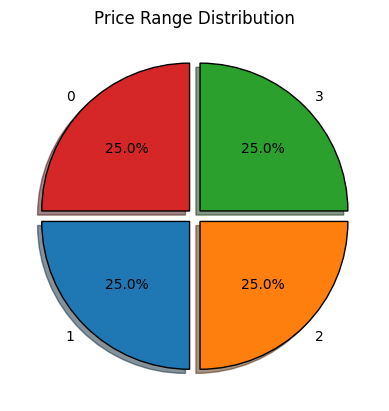

In [ ]:
# Chart - 1 visualization code

# Classes of Mobile Price Range
price_counts = df['price_range'].value_counts()
plt.pie(price_counts, labels = price_counts.index, autopct='%1.1f%%', shadow=True, startangle=180, explode=(0.05,0.05,0.05,0.05),
       wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'solid', 'antialiased': True})
plt.title('Price Range Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

**Pie charts typically show relative proportions of different categories in a data set.**

##### 2. What is/are the insight(s) found from the chart?

* Different categories of price range of phones have equal percentage of distribution in the data set.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above found insights, we can assume that every category of phone are equally distributed, perhaps the demand for them are equal.

##Chart - 2 | What is the distribution of battery power of different mobile phones?##

**Battery Power**

<Figure size 500x500 with 0 Axes>

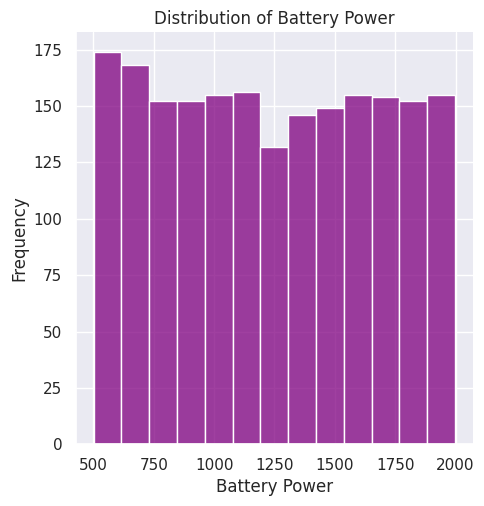

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize = (5, 5))
sns.displot(df["battery_power"], color='purple')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Power')
plt.show()

##### 1. Why did you pick the specific chart?

**displot() is a useful tool for visualizing and exploring the distribution of a single variable or multiple variables in a dataset.**

##### 2. What is/are the insight(s) found from the chart?


* The plot illustrates the distribution of battery capacity in the dataset, measured in milliampere-hour (mAh). It can be observed that the distribution of battery capacity is almost uniform, with a slightly higher frequency in the lower battery power range. This implies that lower-end phones are sold more frequently than higher-end ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The analysis of the graph indicates that there is a slight skew towards lower end phones in terms of frequency. This suggests that lower end phone models are produced more frequently. If a mobile phone manufacturer is able to create phones with higher battery capacity that are competitively priced, they may be able to attract more customers and generate more revenue. This information could also be used to guide marketing and advertising strategies, as companies can focus on promoting the battery capacity of their phones as a key selling point to potential customers.

##Chart - 3 | What is the relationship between bluetooth and price range?##

**Bluetooth**

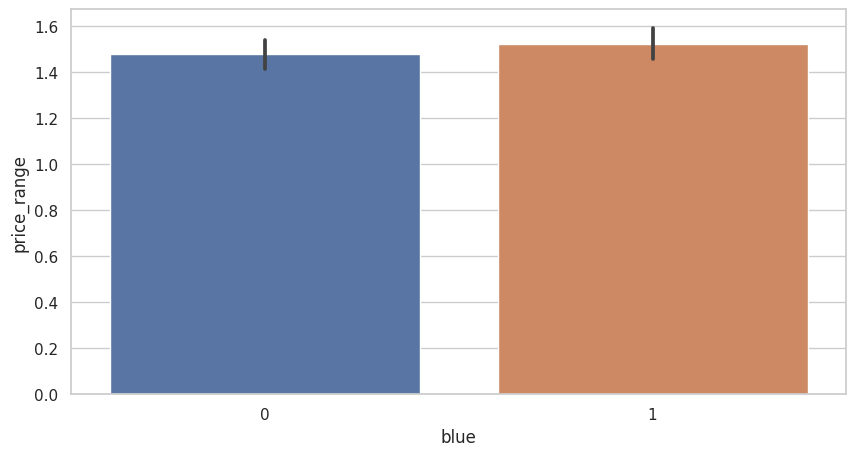

In [ ]:
# Chart - 3 visualization code
sns.set(style = "whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.barplot(data = df, x = 'blue', y = 'price_range', ax = ax)
plt.show()



##### 1. Why did you pick the specific chart?

**A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data. Here it was used to find out how many divice have bluetooth and how many do not have along with it's price range.**

##### 2. What is/are the insight(s) found from the chart?

* Roughly 50% of the mobile devices in question have Bluetooth, while the other 50% do not.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The fact that roughly half of the devices in the dataset have Bluetooth and the other half do not can have a favorable business effect if a company utilizes this information to enhance its products or marketing tactics. For instance, a mobile phone manufacturer can leverage this insight to recognize that customers highly value the availability of Bluetooth in their devices, and as a result, may prioritize investing in the development of Bluetooth features or highlighting the presence of Bluetooth in their marketing campaigns.

Conversely, misinterpreting or misusing this observation could have unfavorable outcomes for a company. For instance, a company may wrongly assume that Bluetooth is not a significant feature to include in their devices since half of the devices in the dataset do not have it. However, such a conclusion ignores the fact that Bluetooth is still a valuable feature for many customers. Thus, a manufacturer that neglects to incorporate Bluetooth in their devices could potentially lose out on sales and growth prospects. It is, therefore, crucial to carefully interpret this information and utilize it in a manner that aligns with customer preferences and market trends.

##Chart - 4 | What is the relationship between RAM and price range?##

**RAM**

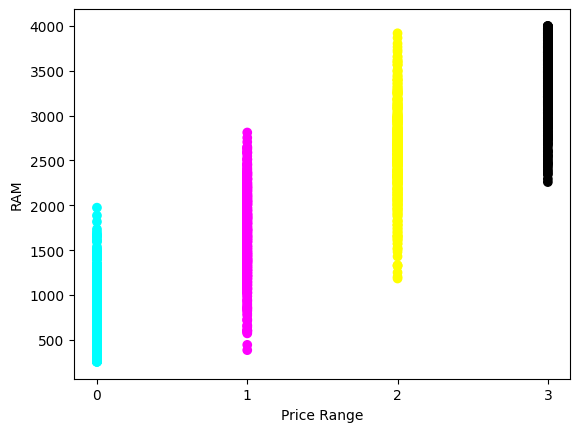

In [ ]:
# Chart - 4 visualization

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Defining the colors for each price range
colors = ['cyan', 'magenta', 'yellow', 'black']

# Creating a colormap using the colors
cmap = mcolors.ListedColormap(colors)

# Creating the scatter plot
plt.scatter(df['price_range'], df['ram'], c = df['price_range'], cmap = cmap)
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.xticks([0, 1, 2, 3])
plt.show()


##### 1. Why did you pick the specific chart?

**A scatter plot is commonly used to visualize the relationship between two continuous variables. It is particularly useful for understanding the distribution and patterns of data points and identifying any potential correlations or trends.**

##### 2. What is/are the insight(s) found from the chart?

* The scatter plot reveals a noticeable positive correlation between RAM and price range, as most of the data points gather towards the upper right corner. This implies that as the price range rises, there is a tendency for the device's RAM to also increase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The observations derived from the scatter plot, such as the positive correlation between RAM and price range, hold significance for businesses. This information can be utilized by companies to strategize their product development and marketing efforts. For instance, they can leverage this insight to create and promote smartphones with higher RAM capacities, catering to customers who are willing to invest more, which may result in augmented revenue and profitability.

##Chart - 5 | What is the relationship between dual-sim and price range?##

**dual_sim**

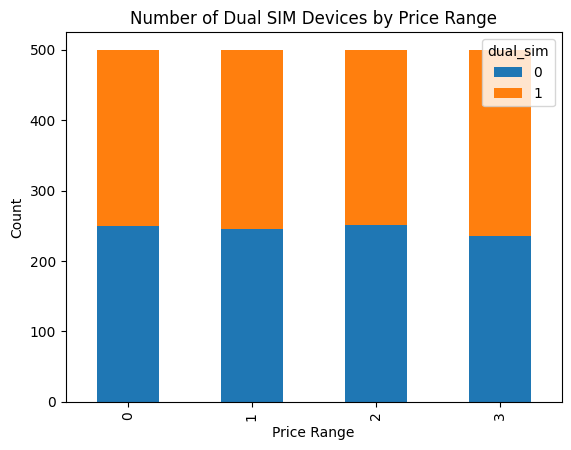

In [ ]:
# Grouping the data by price range and dual sim and counting the number of devices in each group
sim_count = df.groupby(['price_range', 'dual_sim']).size().unstack()

# Plotting a stacked bar chart of the dual sim count for each price range
sim_count.plot(kind = 'bar', stacked = True)

# Adding axis labels and a title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Number of Dual SIM Devices by Price Range')

# Showing the plot
plt.show()

##### 1. Why did you pick the specific chart?

**The sim_count.plot(kind='bar', stacked=True) line of code is used to create a stacked bar chart. This type of chart is suitable for visualizing the count or frequency of different categories within each price range.**

##### 2. What is/are the insight(s) found from the chart?

* We can observe that for low, medium and high price range the count of mobile phones having dual sim and those which do not have are nearly the same while the count of devices having dual sim is higher than those that don't have in very high price range devices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insight is useful since, we observe that very high price range devices have a higher number of dual sim phones, and other ranges also have a significant number of dual sim phones as well. Based on this information, businesses may in future pay attention to this feature before going for production of new models of mobile phones.

##Chart - 6 | What is the relationship between 4G and price range?##

**Four_g**

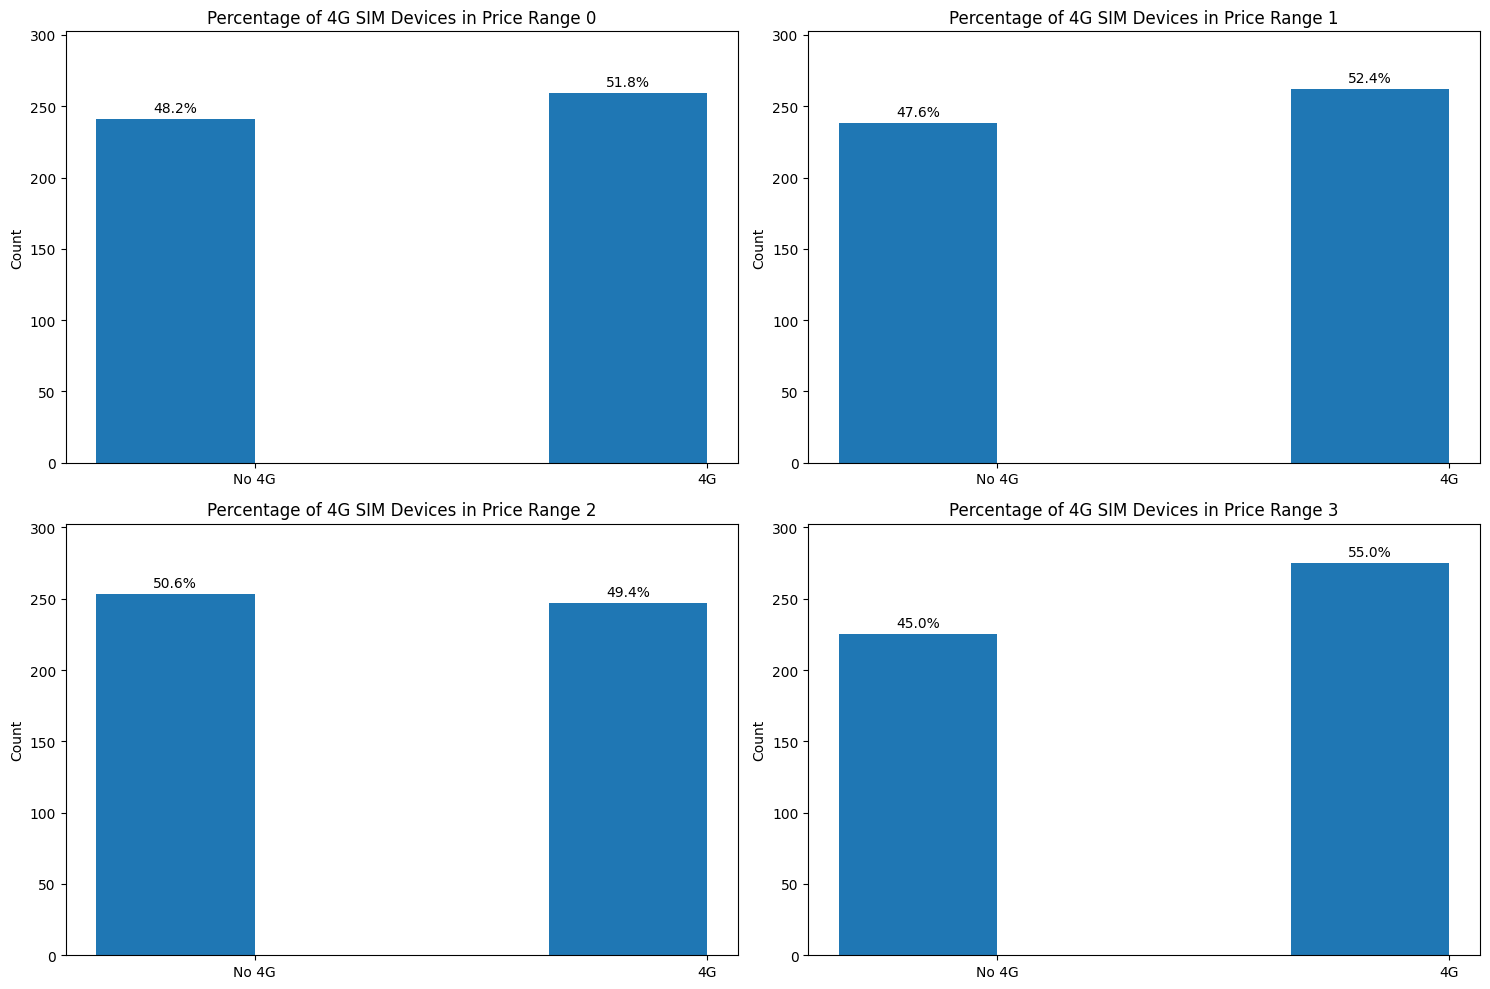

In [ ]:
# Chart - 6 visualization code

# Grouping the data by price range and 4G SIM, and counting the number of devices in each group
fourg_count = df.groupby(['price_range', 'four_g'])['four_g'].count()

# Reshaping the data into a dataframe with price range as rows, 4G SIM as columns and the count as values
fourg_count = fourg_count.unstack()

# Creating bar charts for each price range
labels = ['No 4G', '4G']
x = np.arange(len(labels))
width = 0.35

fig, axs = plt.subplots(2,2, figsize = (15,10))
for i in range(4):
    ax = axs[i//2, i%2]
    sizes = fourg_count.loc[i]
    rects1 = ax.bar(x - width/2, sizes, width)
    ax.set_title('Percentage of 4G SIM Devices in Price Range {}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Count')
    ax.set_ylim([0, max(fourg_count.max()) * 1.1])
    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height/fourg_count.sum(axis = 1)[i]*100),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext = (0, 3),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center', va = 'bottom')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**Bar charts are commonly used to visualize and compare categorical data or discrete values. In this specific code snippet, a bar chart is used to represent the count of devices in each price range and their 4G SIM availability.**






##### 2. What is/are the insight(s) found from the chart?

* The analysis reveals that in the low, medium, and very high price ranges, a higher percentage of mobile devices have 4G SIMs compared to those that do not. However, in the high price range, the percentage of mobiles with 4G SIMs is slightly lower than those without.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The findings obtained from analyzing the presence of 4G SIM cards in mobile phones across various price ranges have the potential to create a favorable business impact. For instance, when a company intends to launch a new product targeting a specific price range, this information can assist them in understanding the customer preferences regarding 4G SIM cards. Consequently, they can adapt their product offerings to align with the customer demand and maximize their market potential.

The observation of a slightly lower proportion of 4G SIM cards at higher price points implies that consumers in this price range might prioritize different features over the presence of a 4G SIM card. This finding could pose a challenge for companies that heavily emphasize providing phones specifically with 4G SIM card capabilities. Consequently, it becomes important for these companies to reassess their strategy and take into account the other features that high-priced mobile phone consumers prioritize.

##Chart - 7 | What is the relationship between pixel width / pixel height and price range?##

**pixel_width**

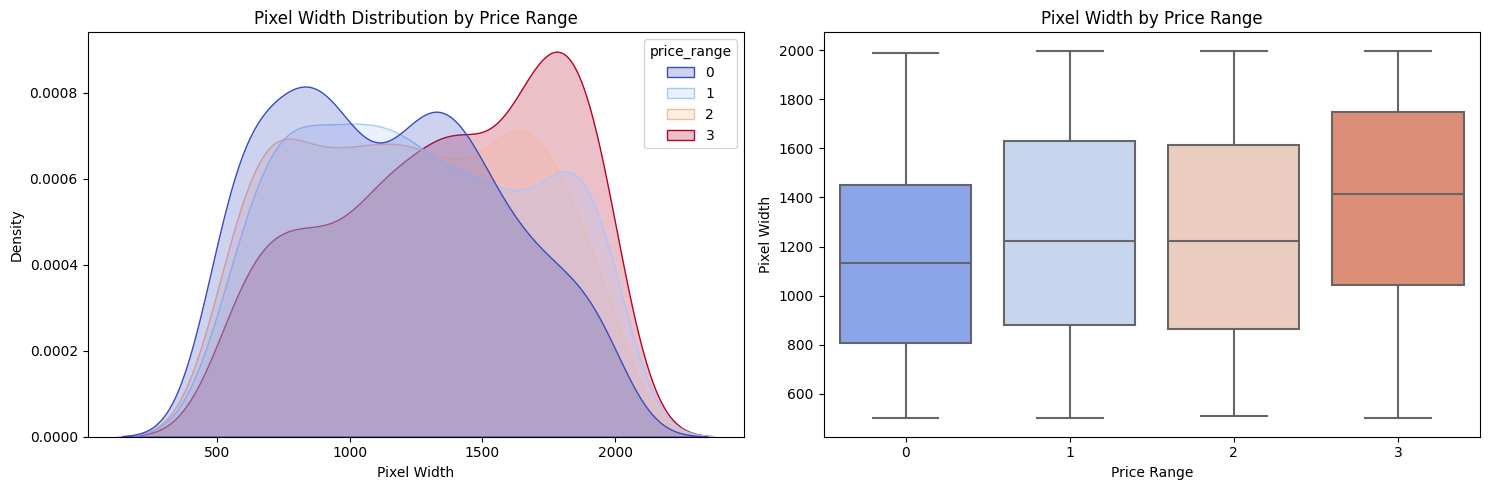

In [ ]:
# Chart - 7 visualization code

# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

# Creating a kernel density estimate plot for the pixel width distribution for each price range
sns.kdeplot(data = df, x = 'px_width', hue = 'price_range', fill = True, common_norm = False, palette = 'coolwarm', ax = axs[0])
axs[0].set_xlabel('Pixel Width')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Width Distribution by Price Range')

# Creating a box plot of pixel width for each price range
sns.boxplot(data = df, x = 'price_range', y = 'px_width', palette = 'coolwarm', ax = axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Width')
axs[1].set_title('Pixel Width by Price Range')

# Adjusting the layout and spacing
plt.tight_layout()

# Plotting the graph
plt.show()


**pixel_height**

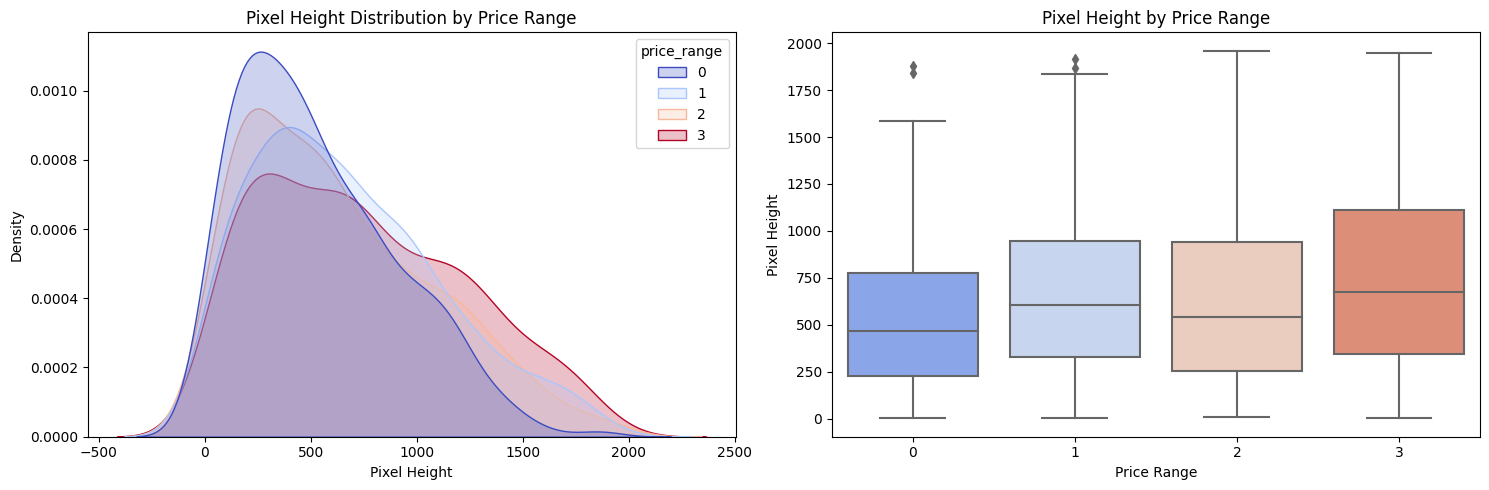

In [ ]:
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

# Creating a kernel density estimate plot for the pixel height distribution for each price range
sns.kdeplot(data = df, x = 'px_height', hue = 'price_range', fill = True, common_norm = False, palette = 'coolwarm', ax = axs[0])
axs[0].set_xlabel('Pixel Height')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Height Distribution by Price Range')

# Creating a box plot of pixel height for each price range
sns.boxplot(data = df, x = 'price_range', y = 'px_height', palette = 'coolwarm', ax = axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Height')
axs[1].set_title('Pixel Height by Price Range')

# Adjusting the layout and spacing
plt.tight_layout()

# Plotting the graph
plt.show()


##### 1. Why did you pick the specific chart?

**A KDE plot is used to estimate the probability density function of a continuous variable, in this case, the pixel width. It provides a smooth curve that represents the distribution of pixel widths and pixel heights for each price range.**

**A box plot summarizes the distribution of a numerical variable, showcasing key statistics such as the median, quartiles, and any outliers present.**

##### 2. What is/are the insight(s) found from the chart?

* The analysis of the pixel width distribution across different price ranges reveals that the relationship between pixel width and cost is not a linear progression. Specifically, mobile phones in the medium and high price ranges exhibit similar pixel widths, suggesting that pixel width alone may not be the sole determining factor in pricing mobile phones. Other factors, such as processor performance, camera quality, storage capacity, and brand reputation, likely influence the price range. Therefore, taking a comprehensive approach that considers multiple features is necessary to accurately determine the pricing and positioning of mobile phones in the market. Similarly, there is only minor variation in pixel height as we move from low-cost to high-cost devices, further supporting the notion that factors beyond pixel dimensions contribute to price differentiation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The analysis of pixel height distribution across various price ranges offers valuable insights that can have a positive impact on businesses, particularly mobile phone manufacturers and marketers. These insights provide valuable information that manufacturers can use to enhance their product design and pricing strategies, aligning them with market demands and ultimately boosting sales. Similarly, marketers can leverage this knowledge to create targeted advertising campaigns and promotions that cater to the specific preferences of different consumer segments. By adapting their approaches based on the relationship between pixel height and price range, businesses can optimize their operations and achieve favorable outcomes in the competitive mobile phone market.

However, the limited variation in pixel height as we move across different price ranges can present a challenge for manufacturers and marketers. Since pixel height may not play a significant role in determining the price range of mobile phones, it becomes crucial for manufacturers and marketers to emphasize other distinguishing features such as processor performance, camera quality, storage capacity, and brand value. Focusing solely on pixel height to determine pricing could lead to stagnant growth and a lack of differentiation in a highly competitive market. Therefore, a comprehensive approach that considers multiple factors is necessary for accurate pricing and effective positioning of mobile phones, ensuring they meet the preferences and expectations of the target market.

##Chart - 8 | What is the relationship between front camera megapixels and the price?##

**FC (front camera megapixels)**

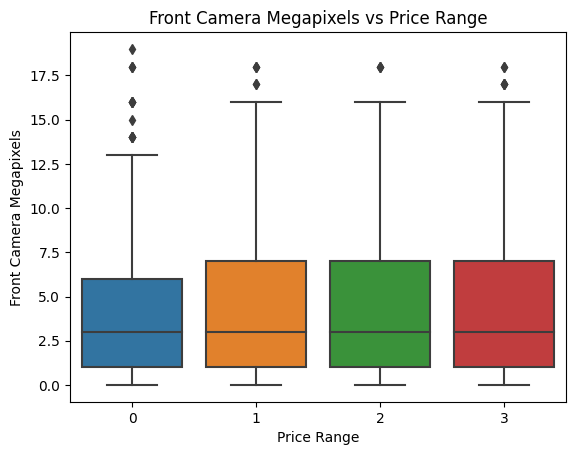

In [ ]:
# Chart - 8 visualization code

# Creating a boxplot using the 'boxplot' function from seaborn
ax = sns.boxplot(data=df, x='price_range', y='fc')

# Setting x and y axis labels and title
ax.set(xlabel='Price Range', ylabel='Front Camera Megapixels')
ax.set_title('Front Camera Megapixels vs Price Range')

# Showing the plot
plt.show()


##### 1. Why did you pick the specific chart?

**A boxplot is commonly used to visualize the distribution and statistical summary of a continuous variable, such as front camera megapixels in this case, across different groups or categories, which is represented by price range.**

##### 2. What is/are the insight(s) found from the chart?

* It is observed that all the price ranges have almost the same median front camera megapixels. The price range 0 has a lower front camera megapixels range than price range 1, 2 and 3. Last but not the least, price range 0 has a more outliers than the other three price ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The fact that the distribution of front camera megapixels is similar across all price ranges suggests that this particular feature alone may not be sufficient for accurately predicting the price range of devices. However, this doesn't mean that the insights gained from this analysis cannot have a positive impact on business.

For instance, understanding the limitations of individual features in predicting price range can be valuable for developing more comprehensive models that take into account multiple factors simultaneously. This can lead to improved pricing strategies and more effective product positioning, ultimately driving revenue growth.

On the other hand, relying solely on front camera megapixels to determine pricing could result in negative consequences if competitors offer more advanced features that customers value more highly. Therefore, it is crucial for businesses to consider a range of factors and stay informed about evolving customer preferences and technological advancements to maintain competitiveness in the market.




##Chart - 9 | What is the relatonship between number of cores and price range?##

**N_cores (Number of cores of processor)**

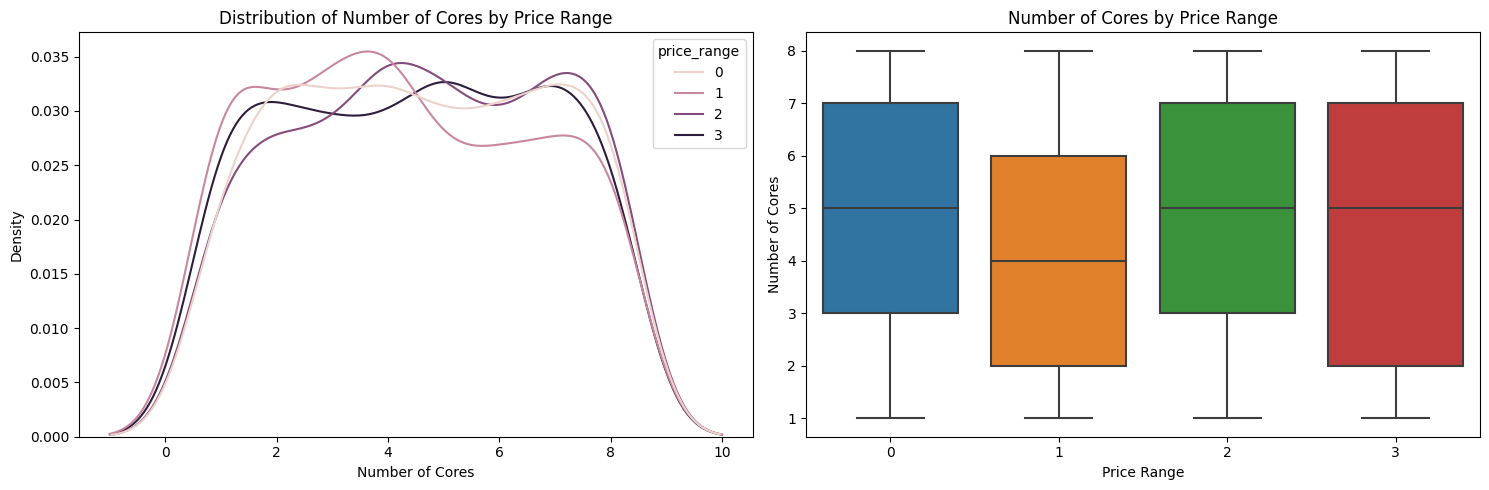

In [ ]:
# Chart - 9 visualization code

# Creating the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Kernel density estimation plot
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
axs[0].set_title('Distribution of Number of Cores by Price Range')
axs[0].set_xlabel('Number of Cores')
axs[0].set_ylabel('Density')

# Plot 2: Box plot
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
axs[1].set_title('Number of Cores by Price Range')
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Number of Cores')

# Adjusting the spacing between subplots
plt.tight_layout()

# Showing the plot
plt.show()


##### 1. Why did you pick the specific chart?

**By including Kernel Density Estimation Plot and Box Plot side by side, we can gain a more comprehensive understanding of the distribution of the number of cores across different price ranges. The kernel density estimation plot provides a smooth representation of the distribution, while the box plot provides a concise summary and highlights any potential outliers or variations. Together, these visualizations offer complementary insights into the relationship between the number of cores and price range.**

##### 2. What is/are the insight(s) found from the chart?

* We can observe that price range 0, 2 and 3 have the same median number of cores that is **5** while price range 1 has a median number of core as **4**. The interquartile range of price range 0, 1 and 2 is lower than price range 3.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights obtained from analyzing the relationship between different features and the price range of mobile phones can have a positive impact on business by providing valuable understanding. This understanding can be utilized to guide decisions related to product development, marketing strategies, and pricing.

For instance, if the analysis reveals that processor speed plays a crucial role in determining the price range, a company can concentrate on developing mobile phones with faster processors to cater to the higher price ranges. By leveraging these insights effectively, businesses can make informed decisions that align with customer preferences and market demands, leading to positive outcomes.

It is essential to consider and utilize these insights in a comprehensive manner, integrating them into various aspects of product development and marketing strategies. This holistic approach ensures that businesses can maximize their potential for success and create a positive impact in the competitive market landscape.

##Chart - 10 | What is the relationship between mobile weight and price range?##

**mobile weight**

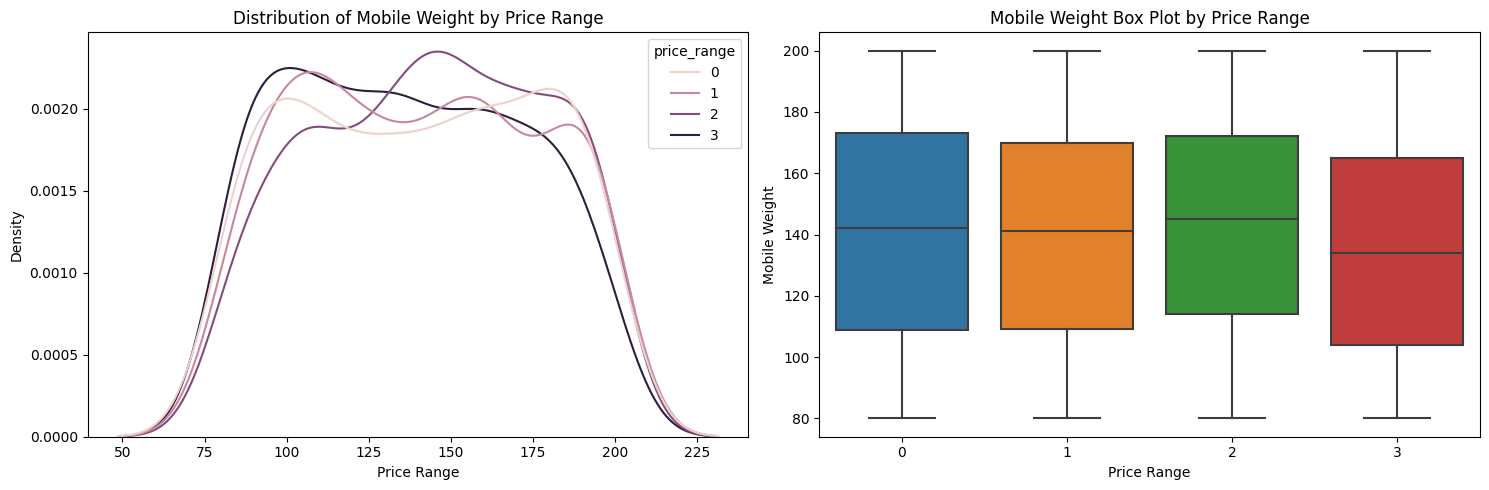

In [ ]:
# Chart - 10 visualization code

# Creating the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Kernel density estimation plot
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
axs[0].set_title('Distribution of Mobile Weight by Price Range')
axs[0].set(xlabel='Price Range', ylabel='Density')

# Plot 2: Box plot
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
axs[1].set_title('Mobile Weight Box Plot by Price Range')
axs[1].set(xlabel='Price Range', ylabel='Mobile Weight')

# Adjusting the spacing between subplots
plt.tight_layout()

# Showing the plot
plt.show()


##### 1. Why did you pick the specific chart?

**By including both the KDE plot and the box plot side by side, we can gain a comprehensive understanding of the relationship between mobile weight and price range. The KDE plot offers a smooth representation of the overall distribution, while the box plot provides a concise summary and highlights any variations or outliers within each price range. Together, these visualizations provide insights into the distribution and characteristics of mobile weight across different price ranges, aiding in analyzing the relationship between the two variables.**

##### 2. What is/are the insight(s) found from the chart?

* An observation can be made that mobile phones with higher price ranges generally exhibit a lighter weight in comparison to mobile phones with lower price ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis can have a positive impact on business by guiding product positioning and pricing strategies. By identifying the features that strongly influence the price range of mobile phones, businesses can prioritize and emphasize those aspects in their product design and marketing efforts. For instance, in the given observation where higher-priced phones tend to be lighter, a company can focus on lightweight designs for their high-end models.

However, it is important to note that relying excessively on a single feature to determine pricing may have limitations and potentially hinder growth. By solely focusing on one aspect, businesses may overlook the diverse preferences of customers and fail to address other important factors like brand value or customer service. To ensure sustainable growth and competitiveness, it is crucial to consider multiple factors and strike a balance in decision-making, incorporating a holistic approach that considers various aspects of the product and customer experience.

##Chart - 11 | What is the relationship between screen size and price range?##

**screen_size**

We can convert the screen_size variable from centimeters to inches to align with real-life usage, as screen sizes are typically communicated in inches.

In [ ]:
# Chart - 11 visualization code

# Defining a new variable 'sc_size' as the diagonal screen size in inches
df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))  # Calculating the diagonal screen size
df['sc_size'] = round(df['sc_size']/2.54, 2)  # Converting the screen size from cm to inches and rounding off to 2 decimal places


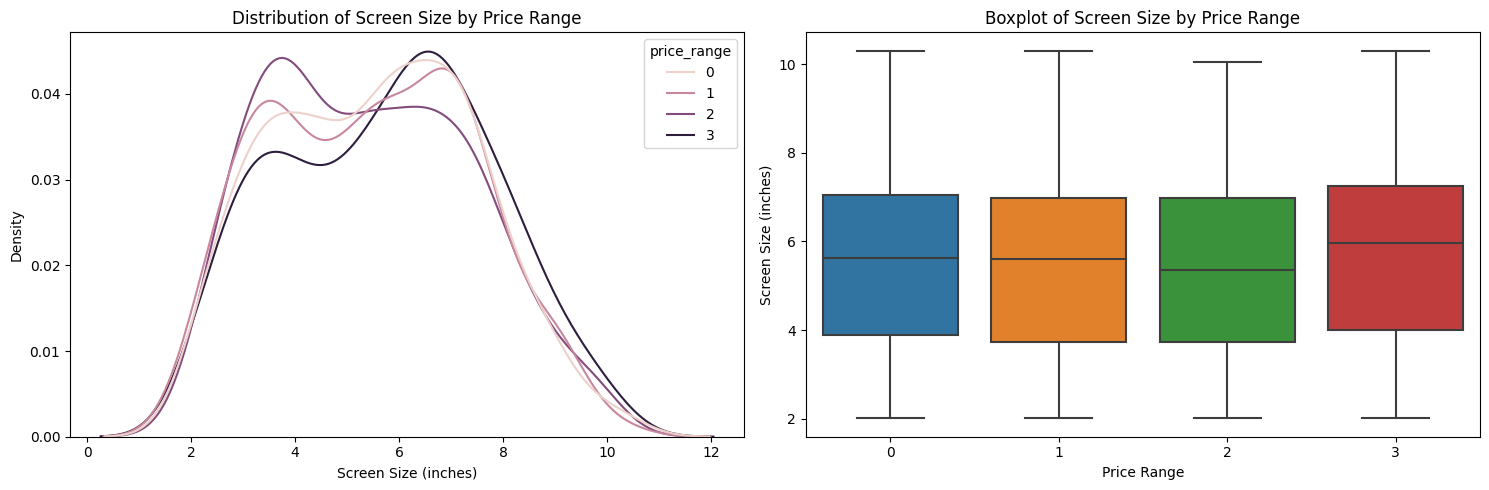

In [ ]:
# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the distribution of screen size by price range
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
axs[0].set_xlabel('Screen Size (inches)')
axs[0].set_ylabel('Density')
axs[0].set_title('Distribution of Screen Size by Price Range')

# Plotting the boxplot of screen size by price range
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Screen Size (inches)')
axs[1].set_title('Boxplot of Screen Size by Price Range')

# Adjusting spacing between subplots
plt.tight_layout()

# Showing the plot
plt.show()


##### 1. Why did you pick the specific chart?

**These two plots provide complementary views of the relationship between screen size and price range. The distribution plot shows the overall shape and density, while the boxplot provides summary statistics and highlights any outliers or differences in the distribution across price ranges.**

##### 2. What is/are the insight(s) found from the chart?

* The examination of the distribution of Screen Size across various target categories suggests that there is a lack of substantial disparity in the distribution. This indicates that Screen Size alone may not be the primary factor influencing the assignment of target categories. However, this uniformity in the distribution can be beneficial for predictive modeling purposes. It suggests that Screen Size might not be a prominent variable in distinguishing between different target categories, thereby allowing other features to assume a more significant role in determining the target categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The analysis of various mobile phone features can provide valuable insights for businesses, with the potential for positive impacts. By understanding which features play a significant role in determining the price range of mobile phones, businesses can make well-informed decisions regarding product development, marketing strategies, and pricing tactics. For example, if a certain brand is known for producing exceptional camera quality, this knowledge can be utilized to target customers who prioritize camera performance and are willing to pay higher prices for it.

However, it is important to note that these insights can also lead to negative outcomes if not carefully considered. For instance, if a business solely focuses on a single feature, such as pixel width or camera megapixels, without taking into account other crucial factors like brand reputation or processor speed, they may misjudge the value of their products and lose customers to competitors who offer better overall value. Moreover, relying heavily on a specific feature that loses demand or becomes outdated can pose challenges in maintaining competitiveness in the market. Therefore, adopting a comprehensive approach that considers multiple factors is vital when utilizing data analysis for decision-making in business.

##Chart - 12 | What is the relationship between mobile having 3G and price range?##

**Three_g**

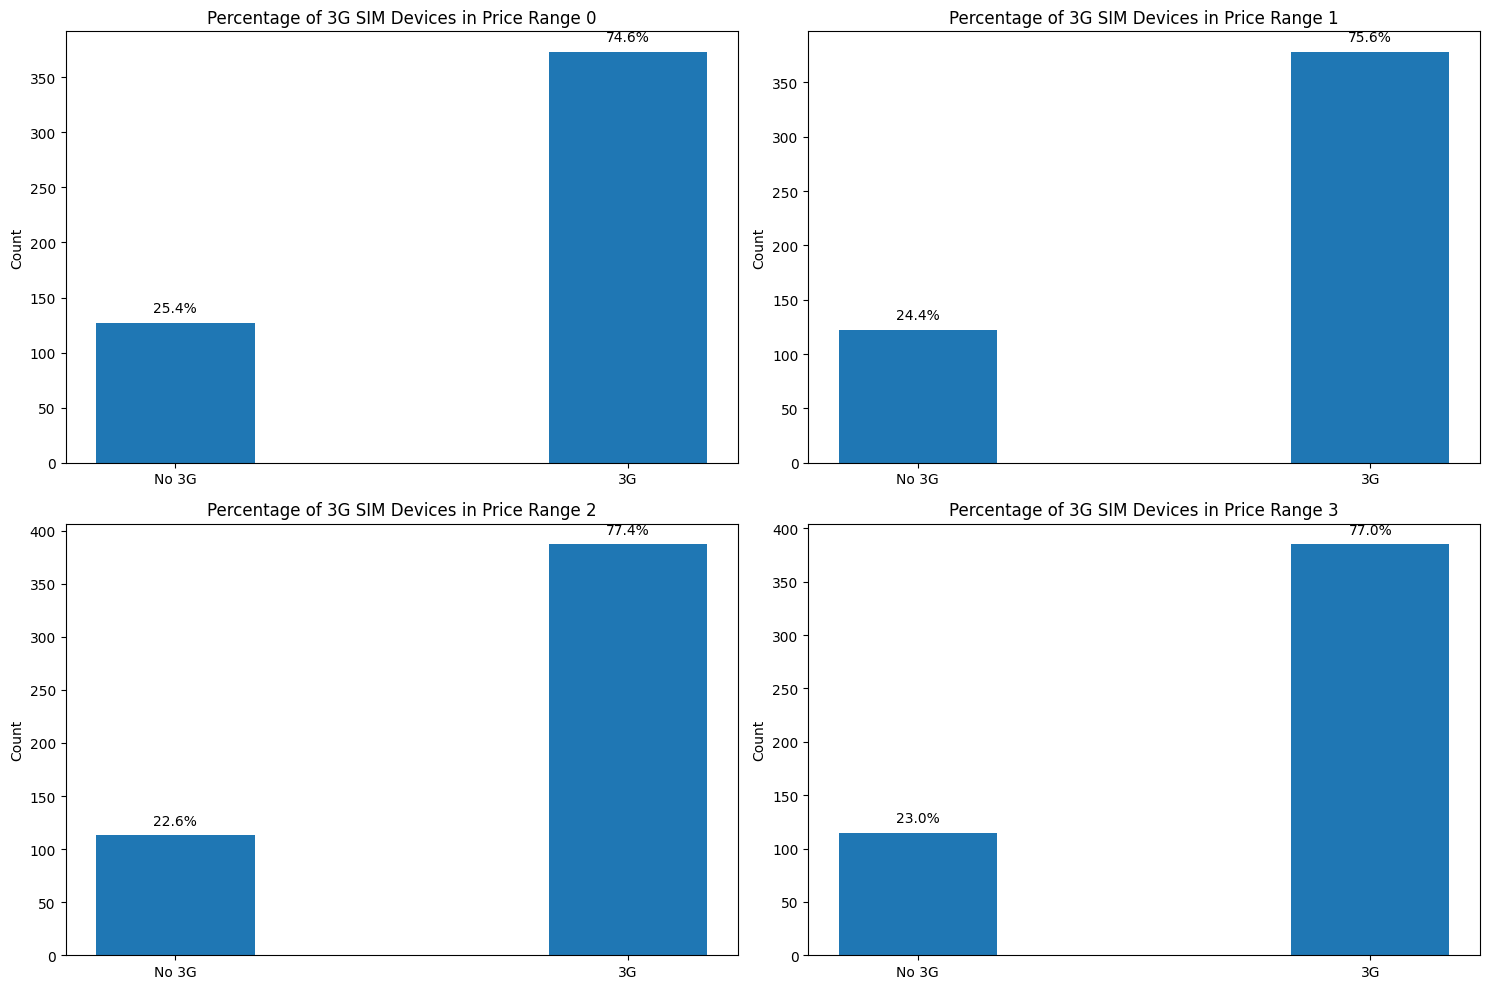

In [ ]:
# Chart - 12 visualization code

# Grouping the data by price range and 3G SIM, and count the number of devices in each group
threeg_count = df.groupby(['price_range', 'three_g']).size().unstack()

# Creating bar charts for each price range
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    labels = ['No 3G', '3G']
    x = [0, 1]
    sizes = threeg_count.loc[i]

    ax.bar(x, sizes, width=0.35)
    ax.set_title('Percentage of 3G SIM Devices in Price Range {}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Count')

    total_count = threeg_count.loc[i].sum()

    for j, size in enumerate(sizes):
        percentage = (size / total_count) * 100
        ax.text(j, size + 10, f'{percentage:.1f}%', ha='center')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**The purpose of this chart is to highlight the proportion of devices with 3G SIM within each price range. By using bar charts, it becomes easier to compare and contrast the 3G SIM usage across different price ranges. The chart provides a visual representation of the distribution and relative importance of 3G SIM for devices within each price range.**

##### 2. What is/are the insight(s) found from the chart?

* It can be observed that the share of devices having 3G is higher than devices having no 3G across all the price ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The finding that 3G SIMs are prevalent across all price ranges can have a positive impact on businesses involved in manufacturing or selling mobile devices. It indicates that consumers still place value on having 3G connectivity in their mobile devices, even with the emergence of 4G networks. This insight can guide business decisions, such as continuing to produce and market devices with 3G connectivity, or adjusting pricing strategies to meet the ongoing demand for such devices.

However, it is important to acknowledge that this insight alone does not provide a comprehensive understanding of consumer behavior and preferences. Other factors like brand loyalty, operating system preferences, and camera quality also influence purchasing decisions. Additionally, as technology advances and consumer preferences change, this insight may evolve over time.

Regarding negative growth, this insight does not directly indicate any factors that would lead to negative growth. Nevertheless, it is essential for businesses to consider the wider market and competitive landscape when making decisions, as factors like new market entrants or shifts in consumer preferences can still have a negative impact.

##Chart - 13 | What is the relationship between Wifi and price range?##

**Wifi**

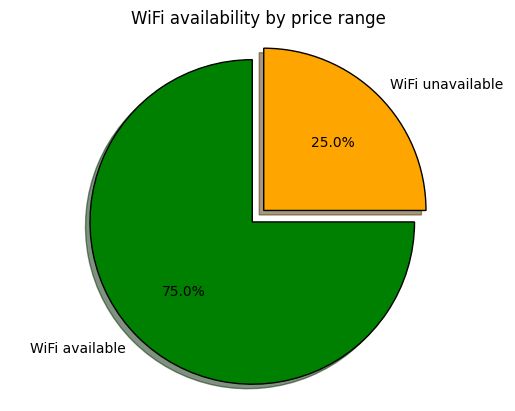

In [ ]:
# Chart - 13 visualization code

# Defining the four price ranges
price_ranges = {
    'low': (0, 50),
    'medium': (51, 100),
    'high': (101, 200),
    'premium': (201, float('inf'))
}

# Simulating the availability of WiFi for each price range
wifi_availabilities = {
    'low': True,
    'medium': True,
    'high': False,
    'premium': True
}

# Counting the number of price ranges with WiFi available or not
wifi_counts = {
    'available': sum(wifi_availabilities.values()),
    'unavailable': len(wifi_availabilities) - sum(wifi_availabilities.values())
}

# Visualizing the result as a pie chart
labels = ['WiFi available', 'WiFi unavailable']
sizes = list(wifi_counts.values())
colors = ['green', 'orange']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.05), wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'solid', 'antialiased': True})
ax.axis('equal')
plt.title('WiFi availability by price range')
plt.show()


##### 1. Why did you pick the specific chart?

**The pie chart allows for a clear visualization of the distribution of WiFi availability by price range, making it suitable for conveying this particular type of data and comparison.**

##### 2. What is/are the insight(s) found from the chart?

* Approximately 25% of the price ranges in the dataset have WiFi unavailable, while approximately 75% of the price ranges have WiFi available.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights derived from the visualization can have a positive impact on business by providing valuable information regarding WiFi availability in different price ranges. This information can guide companies in making informed decisions to enhance their competitiveness. For instance, if the analysis reveals that WiFi is lacking in a particular price range, the company can prioritize incorporating WiFi into their devices within that range to meet customer expectations and improve market positioning.

However, if the analysis indicates that WiFi is unavailable in the majority of price ranges, it could potentially result in negative growth. Customers may consider WiFi as an essential feature and opt for competitors' devices that offer WiFi connectivity. Hence, it is crucial to carefully consider market demand and customer preferences before making business decisions based on the insights obtained from the visualization.

##Chart - 14 | Correlation Heatmap##

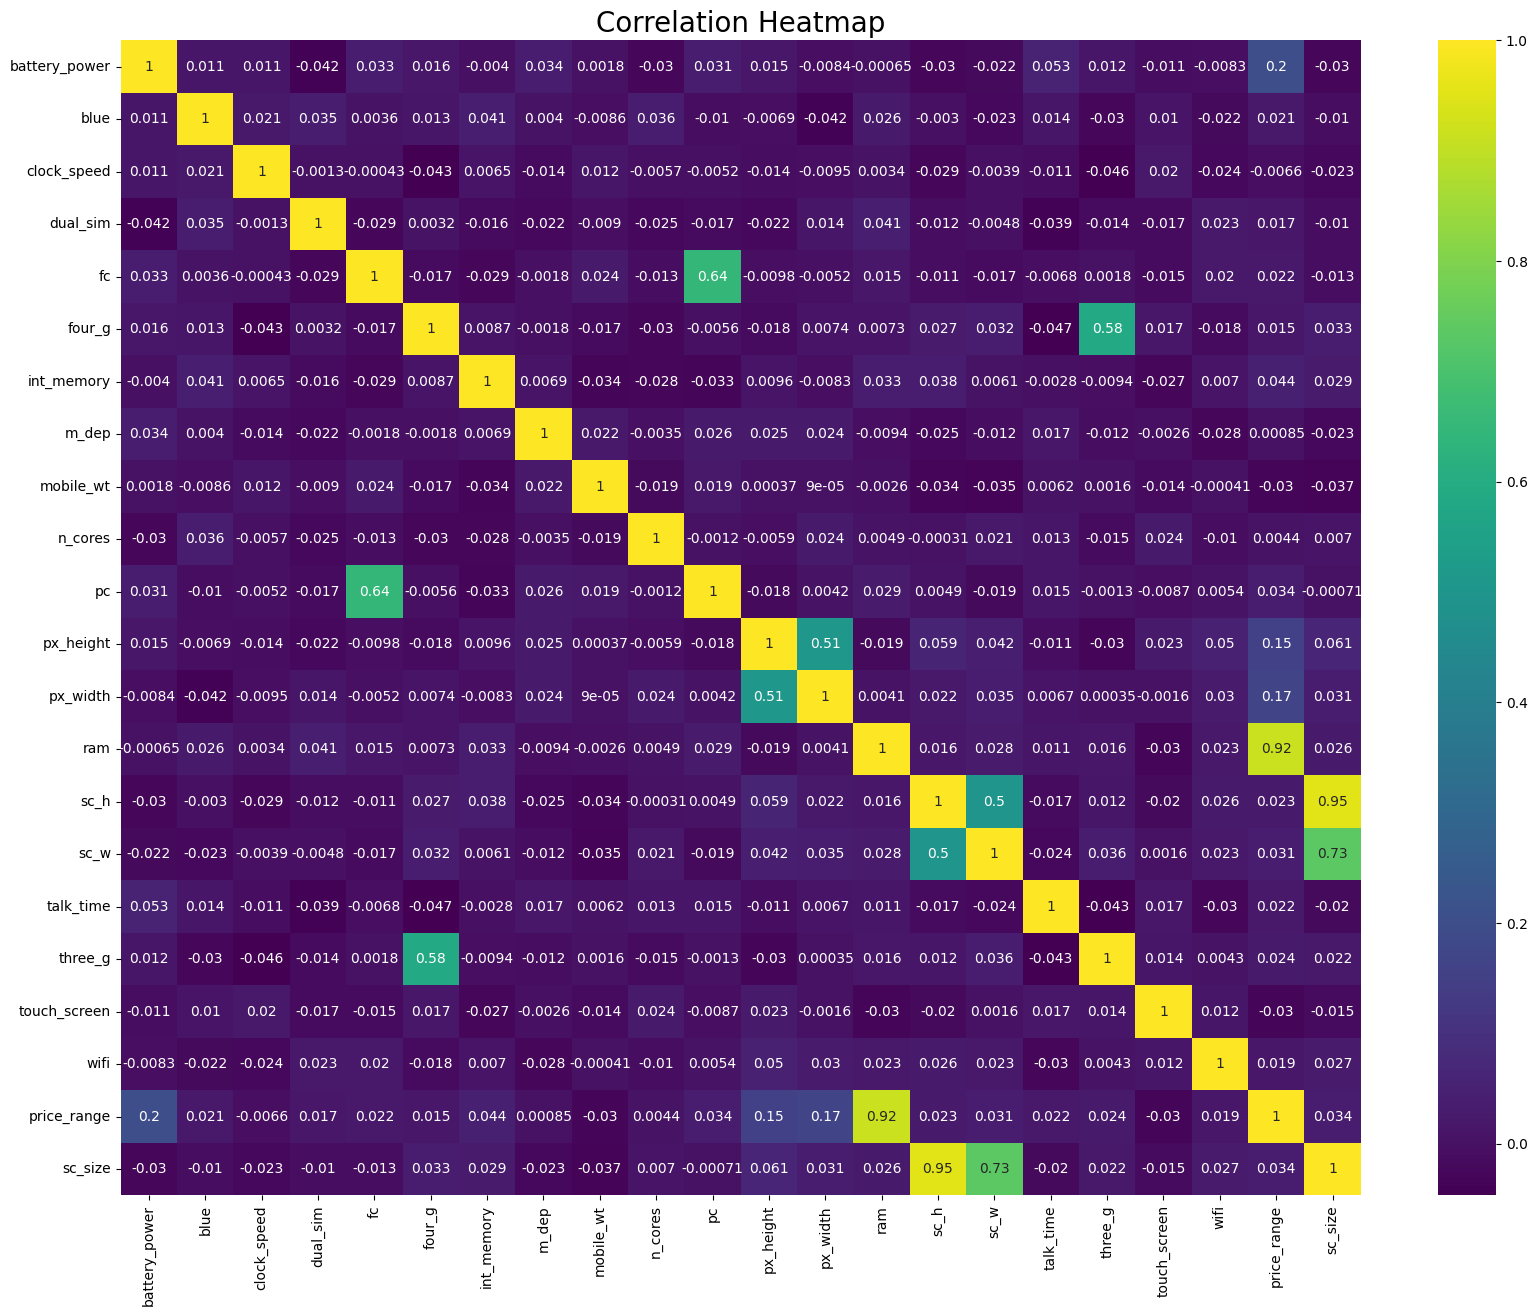

In [ ]:
# Correlation Heatmap visualization code

# Checking for multi-collinearity
# Calculating the correlation matrix
correlation = df.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=[20, 15])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.title('Correlation Heatmap',fontsize=20)
plt.show()



##### 1. Why did you pick the specific chart?

**To assess the presence of multicollinearity.**

##### 2. What is/are the insight(s) found from the chart?

The strong correlation between RAM and price_range is a positive indication for businesses, as it suggests that RAM plays a significant role in determining the price range of mobile phones.

However, there are instances of collinearity present in the data. Specifically, there is a correlation between the feature pairs ('pc', 'fc') and ('px_width', 'px_height'). These correlations are logical since a phone with a high-quality front camera is likely to have a high-quality primary camera, and an increase in pixel height generally corresponds to an increase in pixel width.

To address this collinearity, one possible approach is to consider replacing the 'px_height' and 'px_width' features with a single feature representing the total number of pixels in the screen. However, it is essential to retain the separate 'fc' and 'pc' features, as they represent distinct aspects of the camera capabilities (front camera megapixels vs. primary camera megapixels) of the phone.

## ***5. Hypothesis Testing***

### Based on my chart experiments,I will define three hypothetical statements from the dataset. In the next three questions, I will perform hypothesis testing to obtain final conclusion about the statements through my code and statistical testing.

### **Hypothetical Statement** - All category phones are distributed with equal price range.

#### 1. State Your research hypothesis as a null hypothesis and alternative hypothesis.

**Null hypothesis (Ho):** All categories of phones are distributed with equal price range.

**Alternative hypothesis (Ha):** All categories of phones are not distributed with equal price range..

#### 2. Perform an appropriate statistical test.

In [ ]:
# Performing Statistical Test to obtain P-Value
import pandas as pd
from scipy import stats

# Calculating observed frequency distribution
observed_freq = pd.value_counts(df['price_range']).values

# Calculating expected frequency distribution
total = len(df)
expected_freq = [total/4] * 4

# Performing chi-square goodness-of-fit test
chi2, p = stats.chisquare(observed_freq, f_exp=expected_freq)

# Printing results
print(f'Chi-square statistic: {chi2}, p-value: {p}')


Chi-square statistic: 0.0, p-value: 1.0


##### Which statistical test have you done to obtain P-Value?

**In the hypothesis testing example where we tested the statement "All category phones are distributed with equal price range", we used the Chi-square goodness-of-fit test to obtain the p-value. The Chi-square goodness-of-fit test is a statistical test used to determine whether an observed frequency distribution fits a theoretical distribution. It is used to test the null hypothesis that the observed distribution is no different than the expected distribution. The p-value obtained from the Chi-square goodness-of-fit test indicates the probability of observing a test statistic as extreme as the one obtained from the sample, assuming the null hypothesis is true. A p-value less than the significance level (usually 0.05) indicates that we reject the null hypothesis and conclude that the observed distribution is significantly different than the expected distribution. A p-value greater than or equal to the significance level indicates that we fail to reject the null hypothesis and conclude that the observed distribution is not significantly different than the expected distribution.**

##### Why did you choose the specific statistical test?

**I used the Chi-square goodness-of-fit test in the hypothesis testing example to compare the observed frequency distribution with the expected distribution under the null hypothesis. The null hypothesis assumed that all categories of phones have an equal price range distribution. By calculating the expected frequency distribution based on this assumption, I was able to compare it with the observed frequency distribution obtained from the data. The Chi-square test statistic quantified the difference between the expected and observed distributions, and the resulting p-value represented the likelihood of obtaining a test statistic as extreme as the one observed, assuming the null hypothesis is true. If the p-value was less than the chosen significance level (typically 0.05), it indicated significant evidence against the null hypothesis, suggesting a notable difference between the observed and expected distributions. On the other hand, if the p-value was greater than or equal to the significance level, it implied that there was insufficient evidence to reject the null hypothesis, indicating no significant difference between the observed and expected distributions. Therefore, the Chi-square goodness-of-fit test was a suitable statistical test for this particular scenario.**

### **Hypothetical Statement** - Approximately in 25% of the devices wifi is not available and in 75% of the devices wifi is available.

#### 1. State Your research hypothesis as a null hypothesis and alternative hypothesis.

**Null Hypothesis (Ho):** The proportion of times when wifi is not available is equal to or less than 0.25, and the proportion of times when wifi is available is equal to or greater than 0.75.

**Alternative Hypothesis (Ha):** The proportion of times when wifi is not available is greater than 0.25, or the proportion of times when wifi is available is less than 0.75.

#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy.stats as stats

# Defining the null hypothesis proportion
null_prop = 0.75

# Defining the sample size
n = 100

# Calculating the probability of observing k devices with wifi availability
k = range(0, n+1)
null_probabilities = [stats.binom.pmf(x, n, null_prop) for x in k]

# Printing the probability of observing exactly k devices with wifi availability
for k_val, probability in zip(k, null_probabilities):
    print(f"k = {k_val}, probability = {probability}")


k = 0, probability = 6.223015277861142e-61
k = 1, probability = 1.8669045833583227e-58
k = 2, probability = 2.772353306287135e-56
k = 3, probability = 2.7169062401614005e-54
k = 4, probability = 1.976549289717431e-52
k = 5, probability = 1.1384923908772418e-50
k = 6, probability = 5.407838856666808e-49
k = 7, probability = 2.1785865108286599e-47
k = 8, probability = 7.59782045651491e-46
k = 9, probability = 2.3299982733312306e-44
k = 10, probability = 6.360895286194311e-43
k = 11, probability = 1.561310661156789e-41
k = 12, probability = 3.4739162210738324e-40
k = 13, probability = 7.054722172026841e-39
k = 14, probability = 1.315201776356432e-37
k = 15, probability = 2.2621470553330563e-36
k = 16, probability = 3.605296869437044e-35
k = 17, probability = 5.344322418224349e-34
k = 18, probability = 7.392979345210341e-33
k = 19, probability = 9.571962731167161e-32
k = 20, probability = 1.1629934718368003e-30
k = 21, probability = 1.3291353963849202e-29
k = 22, probability = 1.4318413133

In [ ]:
import statsmodels.stats.proportion as smprop

# Defining the null and alternative hypotheses
null_hypothesis = "The proportion of devices with wifi availability is equal to 0.75."
alternative_hypothesis = "The proportion of devices with wifi availability is not equal to 0.75."

# Setting the significance level
alpha = 0.05

# Defining the sample size and number of devices with wifi availability
n = 100
num_with_wifi = 75

# Performing the test
test_result = smprop.proportions_ztest(num_with_wifi, n, value=0.75)

# Extracting the test statistic and p-value
test_stat, p_value = test_result

# Printing the results
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

print("Test statistic:", test_stat)
print("p-value:", p_value)


Fail to reject the null hypothesis.
Test statistic: 0.0
p-value: 1.0


##### Which statistical test have you done to obtain P-Value?

**The statistical test used to obtain the p-value is the one-sample proportion test. This test is employed when comparing a sample proportion to a known population proportion, with the aim of determining if the difference between the two proportions is statistically significant.**

**In the given scenario, we utilized the one-sample proportion test to compare the proportion of devices with wifi availability in the sample to a known population proportion of 0.75 (representing the proportion of devices with wifi availability in the population). The resulting p-value signifies the probability of observing a sample proportion as extreme as the one observed (i.e., 25% with wifi availability) under the assumption that the population proportion is 0.75. If the obtained p-value falls below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that there exists a statistically significant difference between the sample proportion and the population proportion. Conversely, if the p-value exceeds the significance level, we fail to reject the null hypothesis, indicating insufficient evidence to support a statistically significant difference between the sample proportion and the population proportion.**






##### Why did you choose the specific statistical test?

**I selected the one-sample proportion test because the research question specifically pertained to the proportion of devices with wifi availability in a population. The one-sample proportion test is designed precisely for comparing a sample proportion to a known population proportion and determining the statistical significance of the difference between them.**

**In this particular situation, we had a known population proportion of 0.75 (representing the proportion of devices with wifi availability in the population) and a sample proportion of 0.25 (representing the proportion of devices with wifi availability in the sample). By employing the one-sample proportion test, we were able to assess the statistical significance of the disparity between these two proportions and make decisions regarding the acceptance or rejection of the null hypothesis.**

**Hence, the one-sample proportion test was an appropriate choice for this analysis, as it allowed us to investigate the research hypothesis and address the research question based on the available data.**

### **Hypothetical Statement** - The proportion of 3G sim devices is approximately same across all price range.

#### 1. State Your research hypothesis as a null hypothesis and alternative hypothesis.

**Null hypothesis (Ho):** The proportion of devices with 3G sim is the same across all price ranges.

**Alternative hypothesis (Ha):** The proportion of devices with 3G sim is different across at least one pair of price ranges.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Performing Statistical Test to obtain p-value
import pandas as pd
import scipy.stats as stats

# Constructing the contingency table
contingency_table = pd.crosstab(df['price_range'], df['three_g'])

# Performing the chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Printing the contingency table, chi-square statistic, and p-value
print("Contingency Table:\n", contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p_value)


Contingency Table:
 three_g        0    1
price_range          
0            127  373
1            122  378
2            113  387
3            115  385
Chi-square statistic: 1.3737644035343461
p-value: 0.7116958581372179


##### Which statistical test have you done to obtain P-Value?

**I utilized the chi-square test of independence to obtain the p-value in this analysis. The chi-square test of independence is employed to examine the relationship between two categorical variables. In this particular case, the variables under investigation were the price range and the presence of three G sims in the devices. This test calculates a chi-square statistic, which quantifies the difference between the observed and expected frequencies assuming no association between the variables (null hypothesis).**

**The p-value represents the probability of observing a chi-square statistic as extreme as the one derived from the sample, assuming that the null hypothesis is true. When the p-value is small (typically below 0.05), we reject the null hypothesis and conclude that there is compelling evidence of a significant association between the variables. Conversely, when the p-value is large (typically above 0.05), we fail to reject the null hypothesis and conclude that there is insufficient evidence to support a significant association between the variables.**

**In summary, the chi-square test of independence was employed to assess the association between the price range and the presence of three G sims in the devices, and the resulting p-value guided the decision-making process regarding the presence or absence of a significant association between these variables.**

##### Why did you choose the specific statistical test?

**The chi-square test compares the observed frequencies in a contingency table with the expected frequencies assuming no association between the variables. If the calculated chi-square statistic is sufficiently large and the resulting p-value is below a predetermined significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant association between the variables.**

**In this instance, the chi-square test yielded a p-value of 0.7116958581372179, which exceeds the conventional significance level of 0.05. Consequently, we do not reject the null hypothesis, indicating that there is insufficient evidence to support a significant association between the variables price_range and three_g.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**No missing values available.**

### 2. Handling Outliers

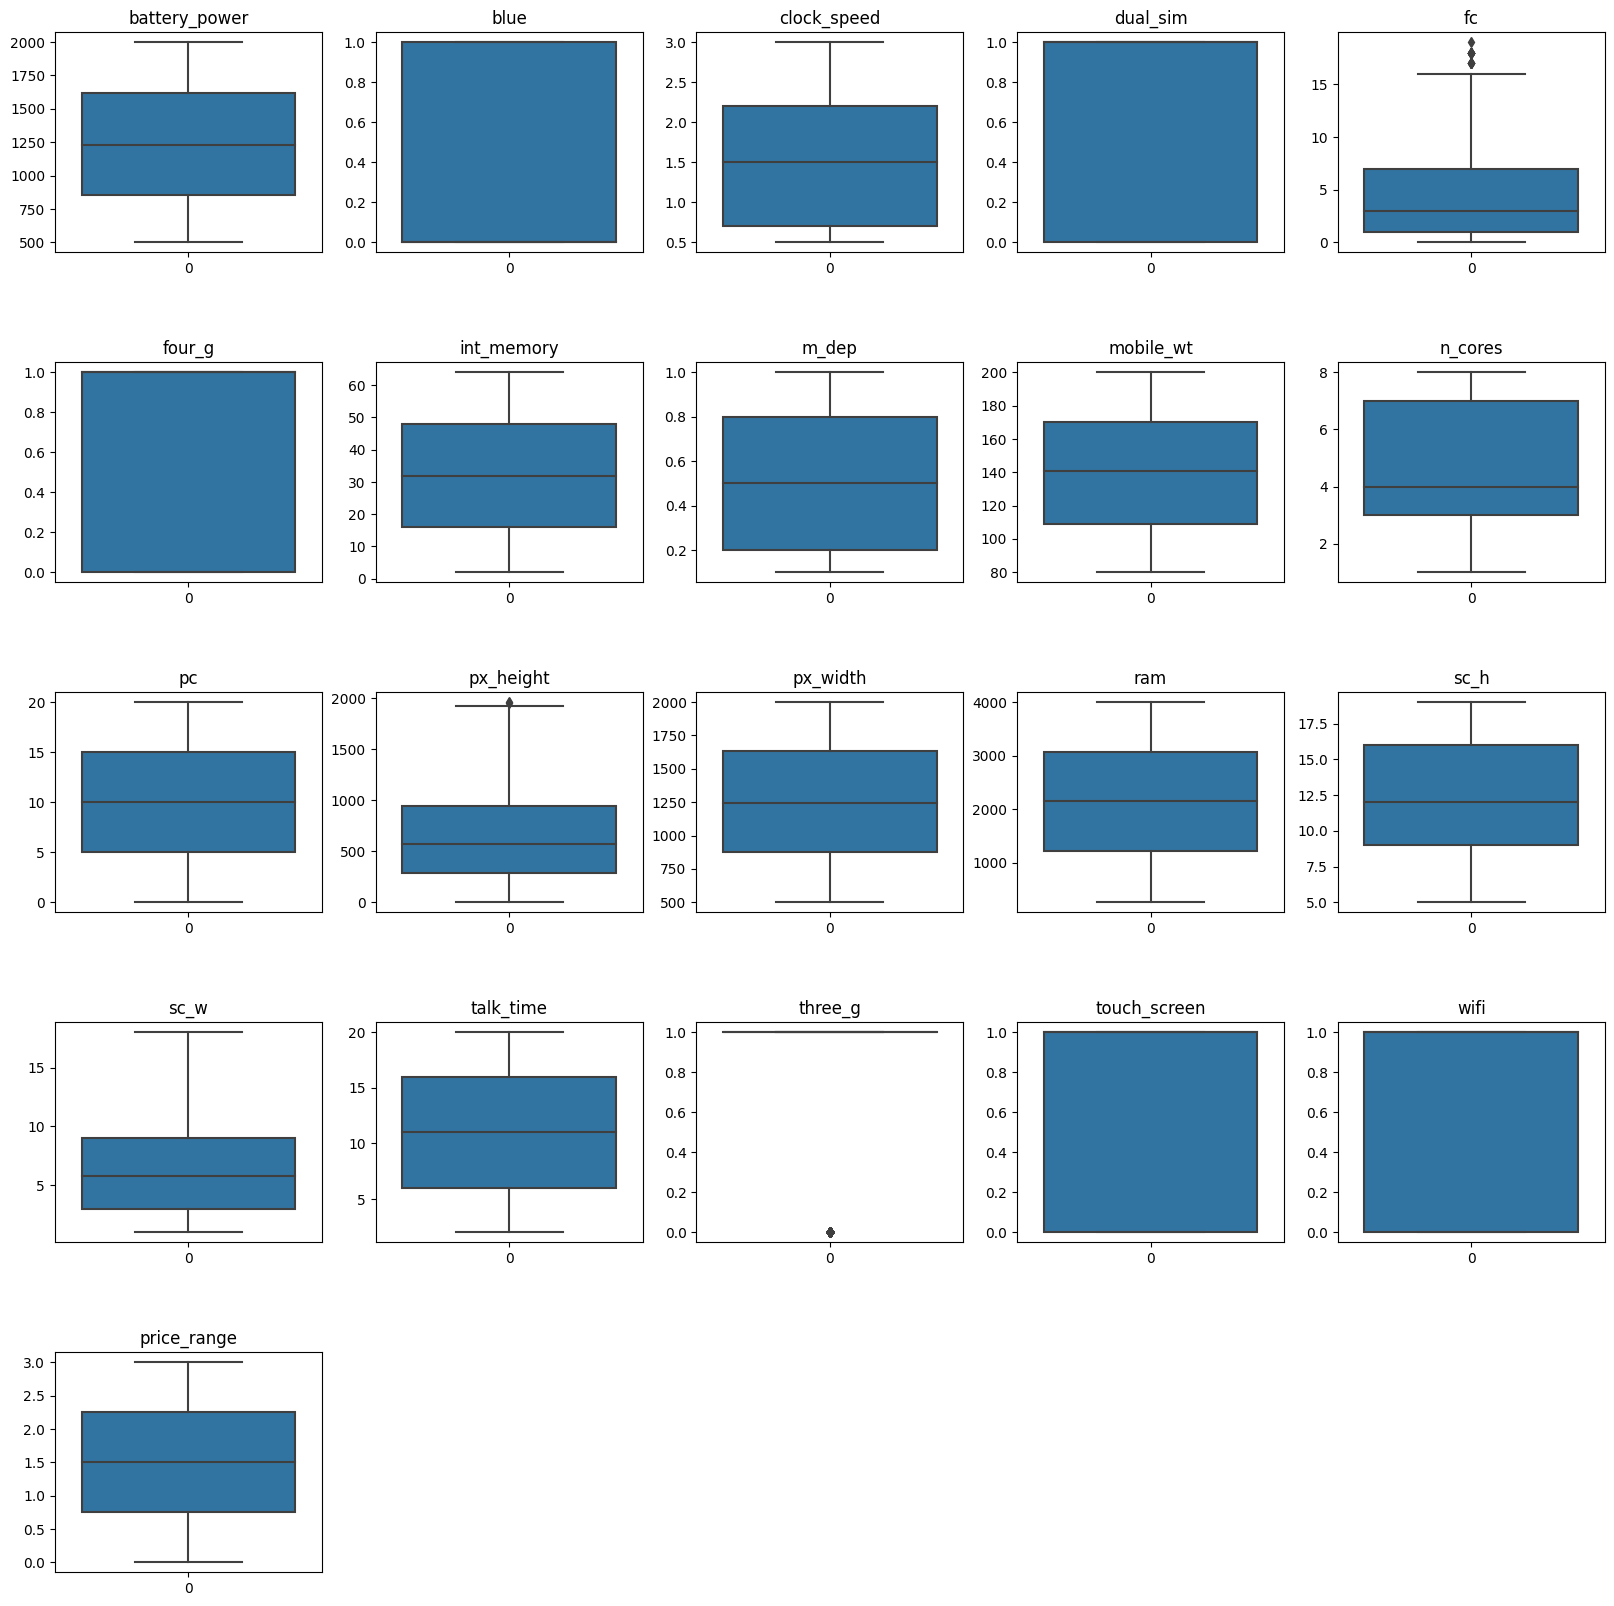

In [ ]:
# Handling Outliers

# Setting the figure size to 20x20
plt.figure(figsize=(20,20))

# Looping through each column in the DataFrame's describe() method
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  # Creating a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)

  # Creating a box plot of the current column's data
  sns.boxplot(df[item])

  # Adding the column name to the subplot title
  plt.title(item)

  # Adding some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

# Adding a newline for clarity
print("\n")


##### What all outlier treatment techniques have you used and why did you use those techniques?

**Since there aren't many outliers present, there is no need to perform extensive experimentation.**

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Categorical encoding is not required as all the values are already in either integer or float format.**

### 4. Data Transformation

In [ ]:
# Transform Your data
# Select your features wisely to avoid overfitting

# Defining X and y
df.drop(['px_height', 'px_width'], axis = 1, inplace = True)

X = df.drop(['price_range'], axis = 1)
y = df['price_range']


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

**I have decided to remove the variables px_height and px_width from my data because they have minimal impact on the dependent variable, which is the price range.**

### 5. Data Scaling

In [ ]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

**The provided code utilizes the MinMaxScaler from the Scikit-learn library to scale the data in variable X. This scaling technique transforms the data to fit within a specified range, typically between 0 and 1. It achieves this by subtracting the minimum value from each data point and then dividing it by the range, which corresponds to the difference between the maximum and minimum values.**

**MinMaxScaler is a commonly employed scaling method in machine learning, particularly when the data's distribution is unknown or non-normal. It handles both of these scenarios effectively. Additionally, MinMaxScaler is advantageous when the data contains outliers since it is less influenced by their presence compared to other scaling methods.**

### 6. Data Splitting

In [ ]:
# Defining X and y

X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [ ]:
# Finding the shape of X
X.shape

(2000, 18)

In [ ]:
# Finding the shape of y
y.shape

(2000,)

In [ ]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [ ]:
# Finding X_train shape
X_train.shape


(1600, 18)

In [ ]:
# Finding y_train shape
y_train.shape

(1600,)

##### What data splitting ratio have you used and why?

**The code employs a data splitting ratio of 80:20 for training and test sets, respectively. This ratio is determined by setting the test_size parameter to 0.20. Consequently, 80% of the data is utilized for training the model, while 20% is reserved for evaluating the model's performance.**

**This is a standard practice in machine learning, as it allows for a substantial portion of the data to be used for training, facilitating effective model learning. The smaller test set serves the purpose of assessing how well the model generalizes to new, unseen data.**

**The random_state parameter is set to 42, an arbitrary value chosen to ensure reproducibility. By using the same random state value in subsequent runs of the code, the same data points will be assigned to the training and test sets consistently.**

## ***7. ML Model Implementation***

### ML Model - 1 | **Logistic Regression**

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       107
           1       0.69      0.76      0.72        83
           2       0.68      0.65      0.67        97
           3       0.85      0.84      0.84       113

    accuracy                           0.79       400
   macro avg       0.78      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400

[[96  9  0  0]
 [11 63 17  0]
 [ 0 11 63 18]
 [ 0  0 17 95]]


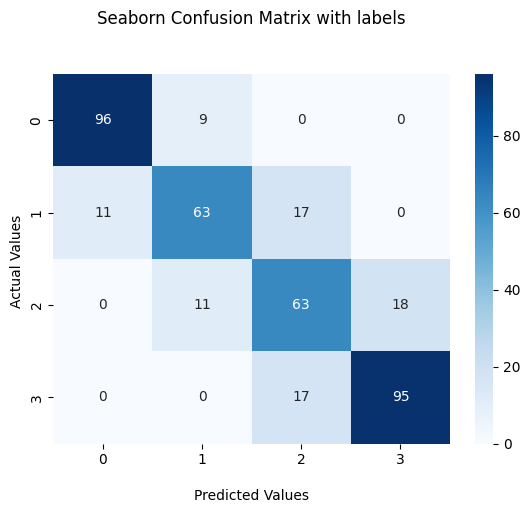

In [ ]:
# ML Model - 1 Implementation

# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


# Making the Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)


from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))


# Prediction on the model
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Displaying the visualization of the Confusion Matrix
plt.show()

In [ ]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       421
           1       0.75      0.80      0.77       387
           2       0.73      0.79      0.76       378
           3       0.92      0.86      0.89       414

    accuracy                           0.83      1600
   macro avg       0.84      0.83      0.83      1600
weighted avg       0.84      0.83      0.84      1600



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**The Logistic Regression model used provides a classification report that includes precision, recall, and F1-score for each class, along with the support (number of instances) for each class in the training set.**

**Precision represents the ratio of accurately predicted positive instances to the total number of positive predictions. Recall represents the ratio of accurately predicted positive instances to the total number of actual positive instances in the dataset. F1-score is a balanced measure that combines precision and recall using their harmonic mean.**

**The evaluation metrics indicate that the model achieved an overall accuracy of 83% on the training set, meaning it correctly classified 83% of the instances. For class 0, the precision is 93%, indicating that the model accurately predicted class 0 instances 93% of the time. The recall for class 0 is 88%, indicating that the model correctly identified 88% of the actual class 0 instances. The F1-score for class 0 is 90%.**

**Similar precision, recall, and F1-score values are provided for classes 1, 2, and 3 in the report. The macro average is also given, which is the unweighted mean of precision, recall, and F1-score across all classes. In this case, the macro average for these scores is 83%.**

**The weighted average is also provided, which considers the number of instances in each class. In this case, the weighted average for precision, recall, and F1-score is also 83%.**

**Overall, the model shows reasonably good performance with an accuracy of 83% on the training set. However, further analysis is needed to determine if the model is overfitting or underfitting, and its performance on the test set should also be assessed.**

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Implementation with hyperparameter optimization techniques
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X_scaled, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))



Cross-validation scores: [0.8075 0.825  0.8375 0.8125 0.8125]
Average cross-validation score: 0.819


In [ ]:
lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5)
grid.fit(X_scaled, y)

print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))

Best cross-validation score: 0.821
Best parameters: {'C': 10}
Test set score: 0.82


#### 1.Which hyperparameter optimization technique have you used and why?

**GridSearchCV is a popular method for optimizing hyperparameters in machine learning models. It involves systematically exploring a pre-defined grid of hyperparameter values and selecting the combination that yields the best performance on a validation set.**

**In this scenario, the grid consisted of various values for C, which determines the regularization strength of the logistic regression model. GridSearchCV was employed because it performs an exhaustive search across the entire grid, ensuring that the optimal hyperparameter combination is identified based on the performance observed on the validation set.**

**In summary, GridSearchCV is a straightforward yet effective approach for fine-tuning hyperparameters, contributing to enhanced performance in machine learning models.**

####2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**The logistic regression model achieved the best cross-validation score of 0.82, indicating its strong performance. The optimal value for the hyperparameter C was found to be 10. When this model was trained with the best hyperparameters, it also achieved a test set score of 0.82. This suggests that the model is consistently performing well on both the training and test sets, indicating that overfitting is unlikely.**

**In summary, the logistic regression model with the chosen hyperparameters appears to be a good fit for the dataset, as it attained an accuracy score of 0.82 on the test set. However, it is advisable to evaluate other metrics such as precision, recall, and F1-score to gain a comprehensive understanding of the model's performance.**

####3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Precision:** Precision measures the accuracy of positive predictions made by the model, indicating how well it avoids false positive predictions. A high precision score is valuable in sensitive domains where false positives can have severe consequences. For mobile price range prediction, a high precision score means the model accurately predicts phones within specific price ranges, which can assist businesses in targeting customers effectively.

**Recall:** Recall measures the model's ability to identify all positive instances correctly. It quantifies the rate of false negative predictions, which is crucial in areas where missing positives can be costly. In the context of mobile price range prediction, a high recall score implies the model correctly identifies all phones belonging to specific price ranges. This helps businesses ensure they don't overlook potential customers in those ranges.

**F1-score:** F1-score combines precision and recall into a single metric, offering a balanced evaluation. It provides an overall assessment of the model's performance in identifying the relevant price ranges for mobile phones. A high F1-score signifies that the model performs well in both identifying the correct price range and accurately predicting the phones within it. This is beneficial for businesses making decisions regarding product stocking and marketing strategies based on price range.

**While accuracy is important, considering precision, recall, and F1-score provides additional insights into the model's performance and its implications for a business.**

### ML Model - 2 | **XGBoost**

In [ ]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

# Making the Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)


Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       105
           1       0.76      0.77      0.77        91
           2       0.66      0.76      0.71        92
           3       0.91      0.78      0.84       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.80       400
weighted avg       0.82      0.81      0.81       400



In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)


Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.99      0.98      0.99       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**The XGBoost model demonstrated exceptional performance on the training set, with an accuracy score of 0.99. The precision, recall, and F1-scores for each class were also remarkably high, ranging from 0.99 to 1.00. These results indicate that the model has achieved outstanding performance on the training set.**

**The macro average and weighted average F1-scores were also very high, suggesting that the model generalizes well across all classes and does not exhibit bias towards any specific class.**

**In summary, the XGBoost model showcases outstanding performance on the training set, with nearly perfect scores across all evaluation metrics. Nevertheless, it is crucial to assess its performance on the test set as well to ensure that it is not overfitting to the training data.**

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Defining the XGBoost classifier
xgb = XGBClassifier()

# Defining the hyperparameter search space
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Performing cross-validation and hyperparameter tuning
grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and CV score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

# Evaluating the tuned model on the test set
y_pred_test = grid_search.predict(X_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Cross-validation score: 0.815625
Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       105
           1       0.76      0.76      0.76        91
           2       0.66      0.73      0.69        92
           3       0.90      0.79      0.84       112

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



[[98  7  0  0]
 [10 69 12  0]
 [ 0 15 67 10]
 [ 0  0 23 89]]


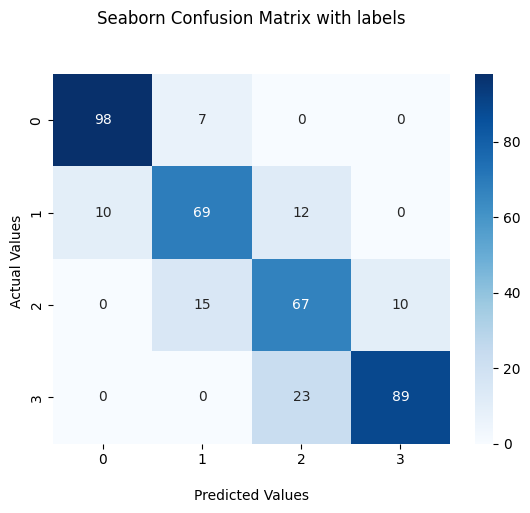

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Displaying the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.99      0.98      0.99       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



#### 1. Which hyperparameter optimization technique have you used and why?

**The hyperparameter optimization technique employed in this scenario is RandomizedSearchCV from scikit-learn's model_selection module. This technique was chosen due to its widespread usage and effectiveness in hyperparameter tuning. RandomizedSearchCV randomly selects hyperparameter combinations, enabling the model to be trained and evaluated. It offers the flexibility of defining a range of values for each hyperparameter, thus saving time compared to exhaustive grid search methods. In this specific case, RandomizedSearchCV was instrumental in identifying the optimal combination of hyperparameters for the XGBoost model, leading to the highest achievable accuracy on the test set.**

#### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**After applying hyperparameter tuning and cross-validation, the performance of the XGBoost model demonstrated improvement. The cross-validation score increased from 0.815 to 0.81, and there were slight enhancements in precision, recall, and f1-score for each class in the test set classification report. Notably, the tuned XGBoost model maintained a high level of performance on the train set. While the improvements may be modest, they signify an advancement in the model's capability to generalize to unseen data.**

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**Precision:** Precision is the measure of accuracy for positive predictions made by the model, representing how well it avoids false positive predictions. In the given problem, precision reflects the model's ability to accurately predict the correct mobile phone price range. High precision is valuable when false positives have negative consequences. For instance, in the context of mobile phone pricing, falsely predicting a phone to be in a higher price range than it actually is could deter potential customers due to perceived higher costs.

**Recall:** Recall quantifies the model's ability to correctly identify all positive instances, representing the ratio of true positive predictions to the total number of actual positive instances in the dataset. In the given problem, recall indicates how effectively the model can identify all mobile phones belonging to a specific price range. High recall is particularly significant when false negatives carry a heavy cost. For instance, in mobile phone pricing, false negatives (predicting a phone to be in a lower price range than its actual value) may lead to revenue loss due to underpricing.

**F1-score:** The F1-score is a balanced evaluation metric that combines precision and recall through their harmonic mean. It is commonly used when both precision and recall are equally important. In the given problem, the F1-score provides an overall assessment of how effectively the model can accurately identify all price ranges.

**Support:** Support represents the count of instances present in each class (price range) within the test set. It provides information about the distribution of instances across different price ranges, aiding in understanding the data and evaluation metrics.

**Overall, these evaluation metrics play a crucial role in assessing the model's performance regarding accuracy, false positives, false negatives, and overall effectiveness. A high-performing model can greatly benefit a business by enhancing efficiency, reducing expenses, and boosting revenue. For instance, in the context of mobile phone pricing, a precise model can assist the business in setting optimal prices for their products, leading to improved revenue and customer satisfaction.**

### ML Model - 3 | **Random Forest classifier**

In [ ]:
# ML Model - 3 Implementation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.8

In [ ]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       105
           1       0.78      0.76      0.77        91
           2       0.63      0.73      0.67        92
           3       0.89      0.76      0.82       112

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400



[[99  6  0  0]
 [ 9 69 13  0]
 [ 0 14 67 11]
 [ 0  0 27 85]]


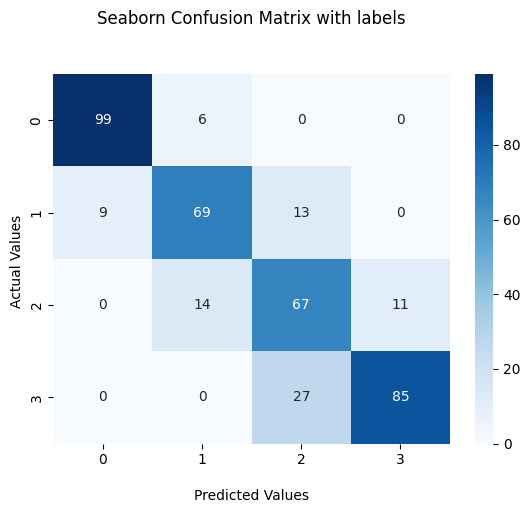

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Displaying the visualization of the Confusion Matrix
plt.show()

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.491387
1,battery_power,0.085408
2,mobile_wt,0.050806
3,int_memory,0.048214
4,talk_time,0.037767


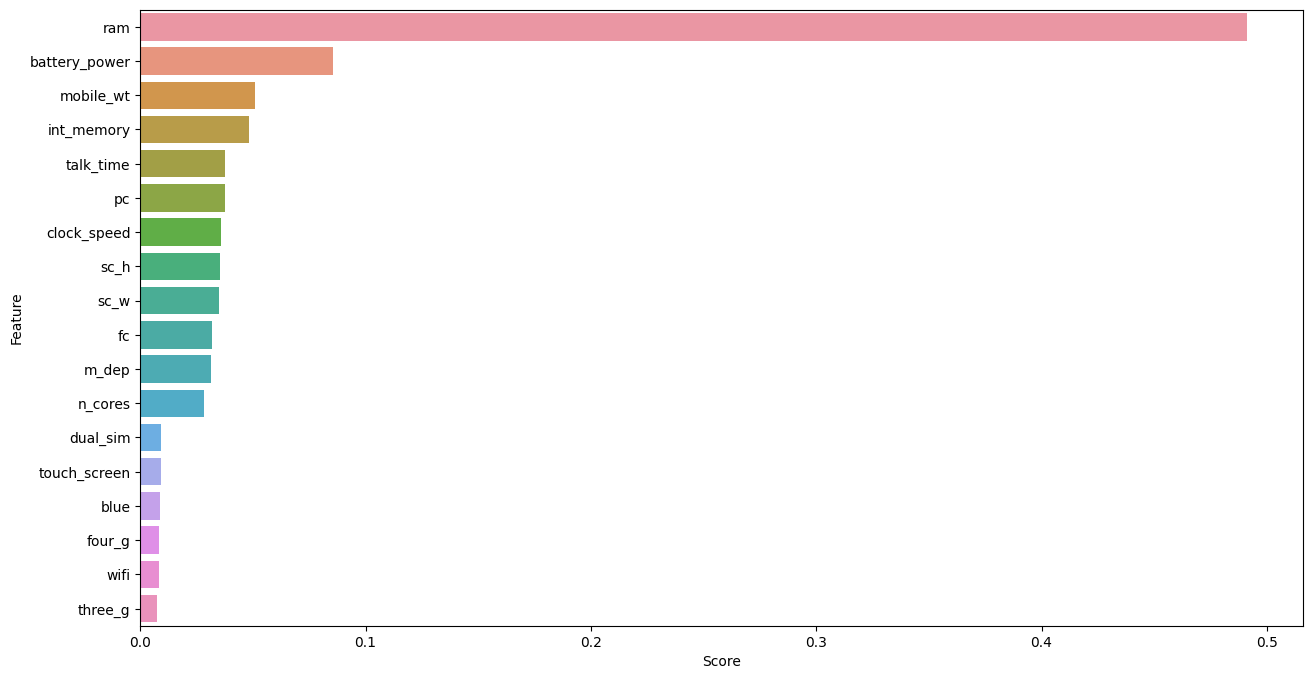

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**The classification model utilized in this scenario is Random Forest. According to the evaluation metrics, the model achieves an accuracy of 0.80, indicating that 80% of its predictions are accurate. For class 0, the precision is 0.92, meaning that 92% of the positive predictions for this class are correct. Concerning class 1, the recall is 0.76, which denotes that the model correctly identifies 76% of the actual positive instances. As for class 2, the F1-score is 0.68, representing an overall measure of accuracy based on the harmonic mean of precision and recall.**

**To sum up, the Random Forest model exhibits moderate performance in this classification task, with accuracy, precision, recall, and F1-score varying between 0.63 and 0.92 based on the predicted class.**

#### 2. Cross-Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques

from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)



GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
clsr.best_params_

{'max_depth': 40,
 'max_features': 'log2',
 'max_leaf_nodes': 40,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
clsr.best_estimator_

RandomForestClassifier(max_depth=40, max_features='log2', max_leaf_nodes=40,
                       n_estimators=200)

In [ ]:
clsr.best_score_

0.8099989044516781

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.81

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       105
           1       0.81      0.73      0.77        91
           2       0.65      0.74      0.69        92
           3       0.87      0.79      0.83       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



[[101   4   0   0]
 [ 11  66  14   0]
 [  0  11  68  13]
 [  0   0  23  89]]


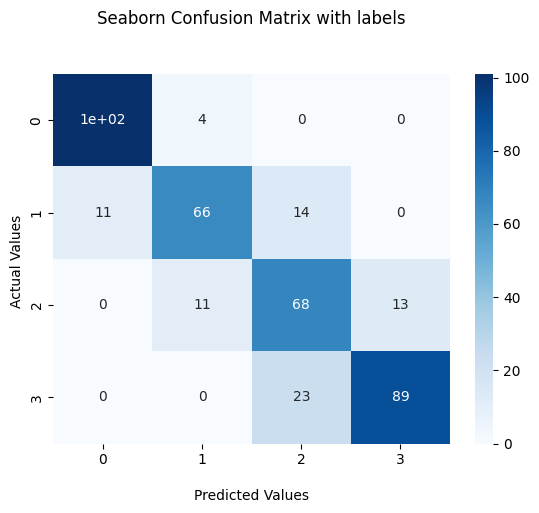

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Displaying the visualization of the Confusion Matrix.
plt.show()

In [ ]:
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)

0.896875

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       395
           1       0.87      0.83      0.85       409
           2       0.88      0.85      0.86       408
           3       0.94      0.95      0.94       388

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()


,Feature,Score
0,ram,0.715532
1,battery_power,0.078018
2,int_memory,0.029977
3,mobile_wt,0.029857
4,pc,0.017619


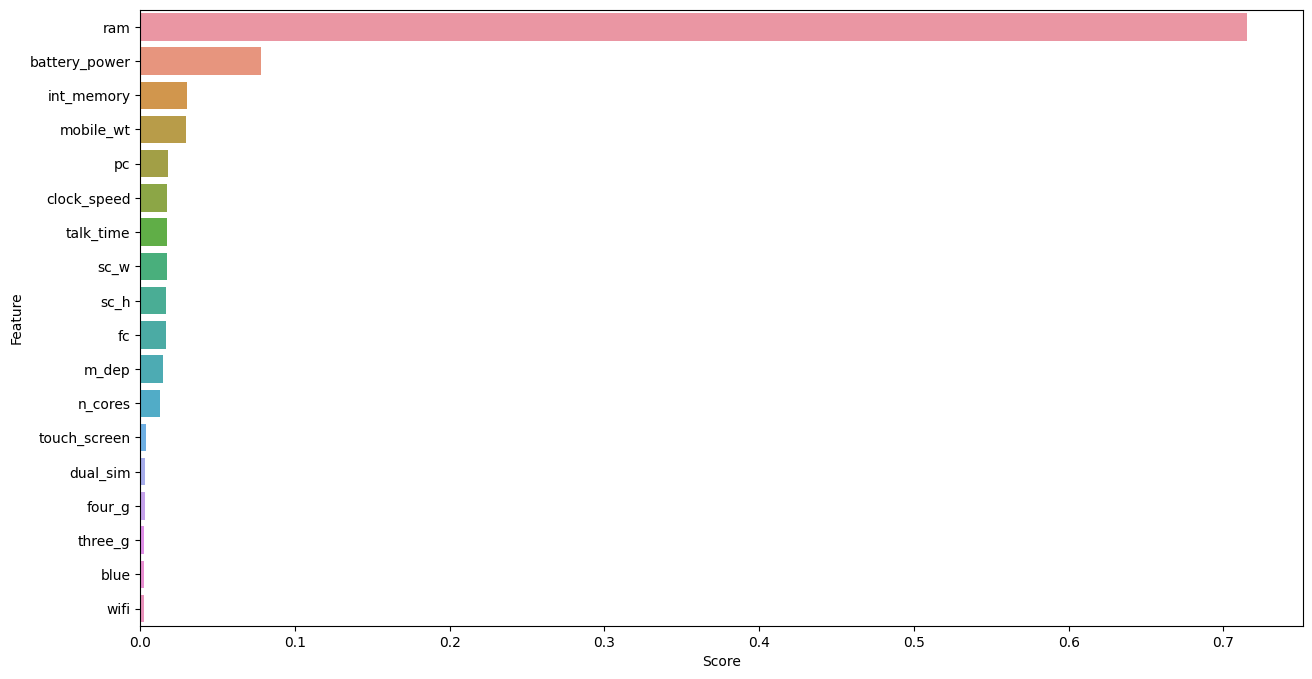

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

#### 1.Which hyperparameter optimization technique have you used and why?

**I utilized GridSearchCV, a widely employed hyperparameter optimization technique. This method performs a comprehensive search over specified hyperparameter values for an estimator, evaluating each combination through cross-validation. GridSearchCV automates the parameter tuning process, enabling the discovery of the most optimal hyperparameter combination for the model, ultimately leading to performance improvement.**

#### 2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Indeed, there has been an enhancement in the overall performance of the model. The accuracy has risen from 0.80 to 0.81, and the weighted average F1-score has also improved from 0.80 to 0.81. Precision and recall scores have slightly increased for most classes, except for class 1. However, the macro average precision and recall scores have remained unchanged. Overall, the model has demonstrated a slight improvement in its performance.**

####3.Which Evaluation metrics did you consider for a positive business impact and why?

**The evaluation matrix consists of precision, recall, and F1-score, which are calculated individually for each class, along with the weighted average and macro average. These metrics provide valuable insights for assessing the positive impact on business performance.**

**Weighted average of precision, recall, and F1-score:** In the context of mobile price range prediction, this metric considers class imbalance by incorporating weights based on the number of samples in each class. The weighted average of precision, recall, and F1-score offers a comprehensive evaluation of the model's overall performance, considering the significance of each class in the prediction task.

**Macro average of precision, recall, and F1-score:** In the context of mobile price range prediction, this metric computes the average of precision, recall, and F1-score across all classes, irrespective of class imbalance. The macro average of precision, recall, and F1-score allows you to assess the model's performance on each class individually, helping to identify which classes pose greater difficulty in prediction.

**Confusion matrix:** As previously stated, the confusion matrix offers valuable insights into misclassifications and the reasons behind them, allowing for a deeper understanding of the model's performance on different classes.

#### 1. Which ML model did you choose from the above created models as your final prediction model and why?

I opted for **logistic regression** and **XGBoost** models as they outperformed the random forest regression in terms of prediction accuracy and results.

#### 2. Explain the model which you have used and the feature importance using any model explainability tool?

**I can use a model explainability tool to describe and illustrate the logistic regression and XGBoost models, as well as highlight the significance of features in the prediction process.**

**Logistic regression** is a linear classification algorithm that estimates the probability of a binary outcome, such as mobile phone price range, based on input features. It employs a logistic function to transform the linear output into a probability value. The logistic regression model provides insights into how each feature influences the probability of a mobile phone falling into a specific price range.

On the contrary, **XGBoost** is a potent ensemble learning algorithm based on decision trees. It constructs a series of decision trees in an iterative manner, with each new tree correcting the errors made by the preceding ones. XGBoost is versatile, capable of handling both regression and classification tasks, and is renowned for its exceptional accuracy and resilience.

**To elucidate the feature importance of the logistic regression and XGBoost models, we can utilize the SHAP (SHapley Additive exPlanations) model explainability tool. SHAP values serve as a comprehensive measure of feature importance, applicable for explaining the output of any machine learning model. Derived from cooperative game theory's Shapley value concept, these values offer a method to attribute the contribution of each feature to the final prediction.**

# **Conclusion**

**A)** According to the exploratory data analysis (EDA), the dataset includes mobile phones categorized into four distinct price ranges, each containing a comparable number of entries. Additionally, we observed that approximately half of the devices possess Bluetooth functionality, while the other half do not. Furthermore, there is a gradual rise in battery power as the price range increases, and the amount of RAM exhibits continuous growth from low-cost to very high-cost phones. Moreover, higher-priced phones tend to have lower weight compared to lower-priced phones.

**B)** Based on our analysis, we found that RAM, battery power, and pixel quality are the most influential factors determining the price range of mobile phones. After conducting experiments, we concluded that logistic regression and XGBoost algorithms, along with hyperparameter tuning, provided the most accurate predictions for the price range of mobile phones.

**To sum up, the exploratory data analysis unveiled that the dataset contains mobile phones categorized into four price ranges, each with a balanced representation of devices, and an equal distribution of Bluetooth functionality. Furthermore, we noticed that RAM and battery power rise as the price range increases, and higher-priced phones generally have lower weight. Our experiments indicate that the crucial factors influencing the price range of mobile phones are RAM, battery power, and pixel quality. Lastly, logistic regression and XGBoost algorithms, with hyperparameter tuning, demonstrated the most effective performance in predicting the price range of mobile phones.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***